# Variables information :-

Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

# EDA

In [2]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
df = pd.read_csv("D:\DATA\data.N\Hotel Reservations.csv")

In [7]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [8]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [9]:
df.shape

(36275, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [11]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df=df.drop(["Booking_ID","arrival_year","arrival_month","arrival_date"],axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   market_segment_type                   36275 non-null  object 
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [15]:
categorical_cols = []
for i in df.columns:
    if df[i].dtype == "O":
        categorical_cols.append(i)
    else:
        pass

In [16]:
print(categorical_cols)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [17]:
for j in categorical_cols:
    print("Column :-",j)
    print(df[j].value_counts())
    print("")

Column :- type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Column :- room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Column :- market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Column :- booking_status
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64



In [18]:
df["booking_status"].value_counts()[0]

24390

In [19]:
df["booking_status"].value_counts()[1]

11885

In [20]:
df["booking_status"].value_counts()[0]/(df["booking_status"].value_counts()[0]+df["booking_status"].value_counts()[1])*100

67.23638869745004

Column :- type_of_meal_plan


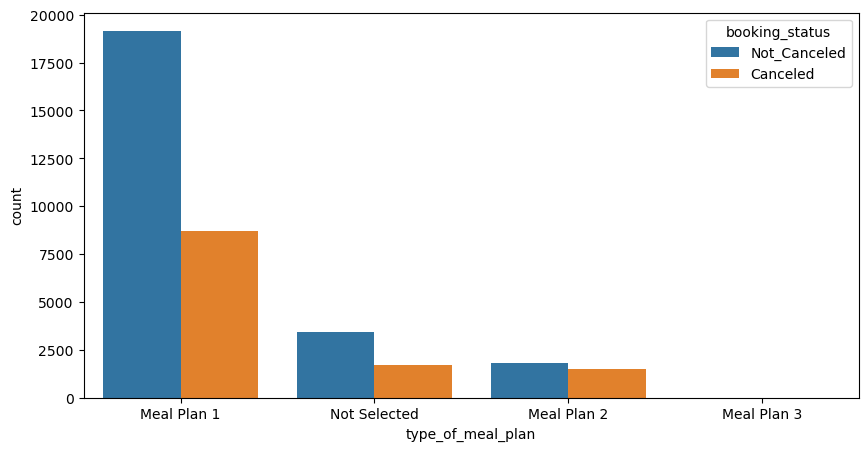


Column :- room_type_reserved


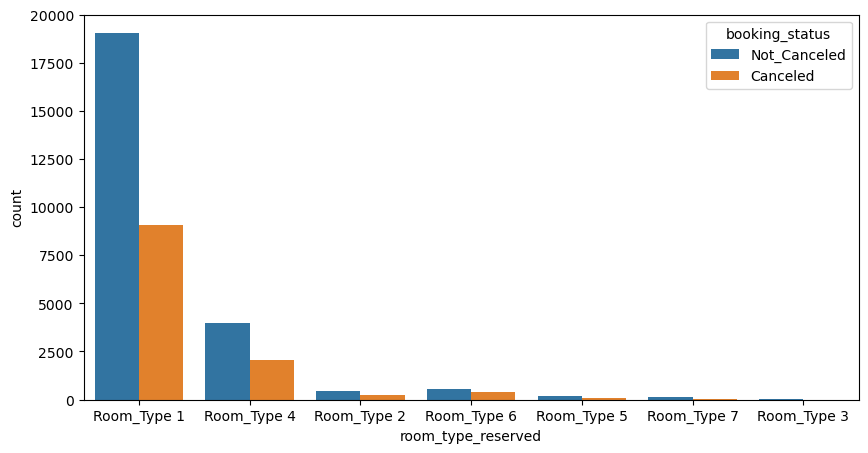


Column :- market_segment_type


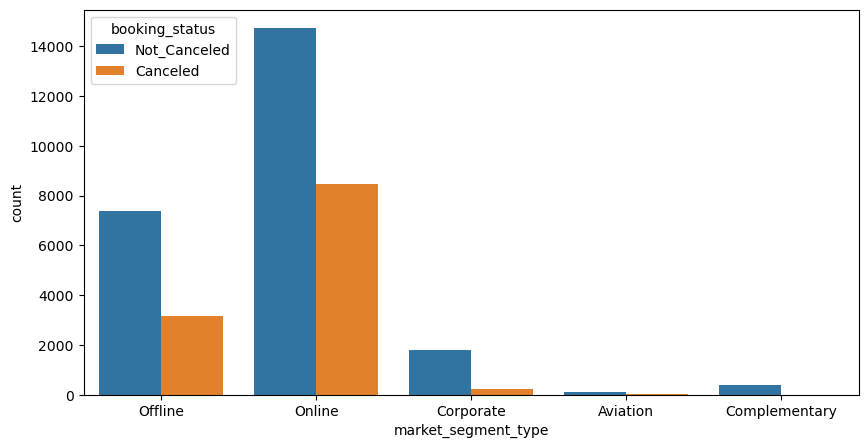


Column :- booking_status


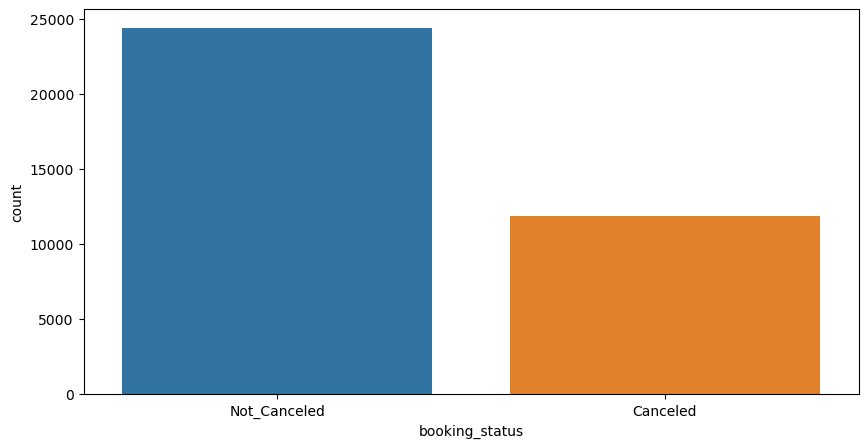

In [21]:
for k in categorical_cols:
    print("Column :-",k)
    if k !="booking_status":
        plt.figure(figsize =(10,5))
        sns.countplot(x =k,hue="booking_status",data=df)
        plt.show()
        print("")
    else:
        plt.figure(figsize =(10,5))
        sns.countplot(x= k,data = df)
        plt.show()

# Pie plots

In [22]:
room_type_reserved_name=df.room_type_reserved.value_counts().index

In [23]:
room_type_reserved_val=df.room_type_reserved.value_counts().values

In [24]:
room_type_reserved_name

Index(['Room_Type 1', 'Room_Type 4', 'Room_Type 6', 'Room_Type 2',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x25db1df7790>,
 [Text(-0.8903576384722115, 0.6459591903628178, 'Room_Type 1'),
  Text(0.8313450190209319, -0.7203231631351906, 'Room_Type 4'),
  Text(1.0959034143272826, -0.09484569819345856, 'Room_Type 6')],
 [Text(-0.4856496209848426, 0.3523413765615369, '80.02%'),
  Text(0.45346091946596284, -0.39290354352828577, '17.23%'),
  Text(0.5977654987239722, -0.05173401719643193, '2.75%')])

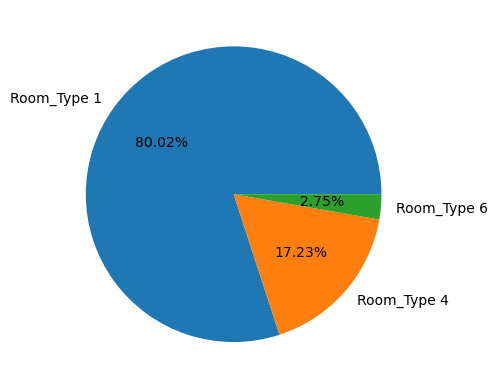

In [25]:
plt.pie(room_type_reserved_val[0:3],labels=room_type_reserved_name[0:3],autopct="%1.2f%%")

In [26]:
type_of_meal_plan_name=df.type_of_meal_plan.value_counts().index

In [27]:
type_of_meal_plan_val=df.type_of_meal_plan.value_counts().values

In [28]:
type_of_meal_plan_name

Index(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'], dtype='object')

([<matplotlib.patches.Wedge at 0x25db1e6f4f0>,
 [Text(-0.81924199766319, 0.7340589548972384, 'Meal Plan 1'),
  Text(0.5786225777513018, -0.9355190604773581, 'Not Selected'),
  Text(1.0552345930118299, -0.3106122240208163, 'Meal Plan 2')],
 [Text(-0.44685927145264903, 0.4003957935803118, '76.74%'),
  Text(0.31561231513707366, -0.5102831238967408, '14.14%'),
  Text(0.5755825052791799, -0.16942484946589978, '9.11%')])

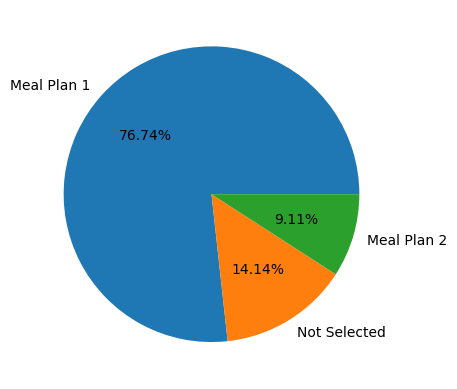

In [29]:
plt.pie(type_of_meal_plan_val[0:3],labels=type_of_meal_plan_name[0:3],autopct="%1.2f%%")

Column: type_of_meal_plan


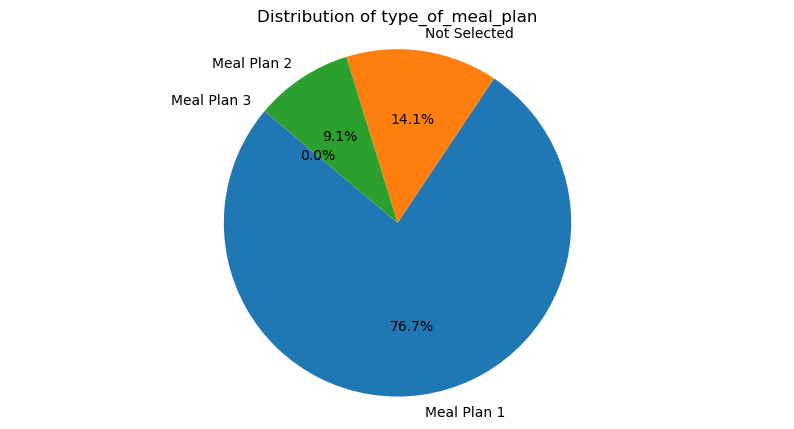


Column: room_type_reserved


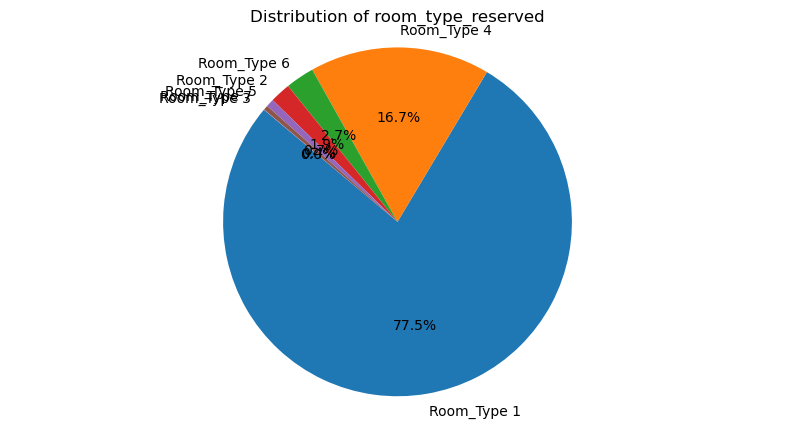


Column: market_segment_type


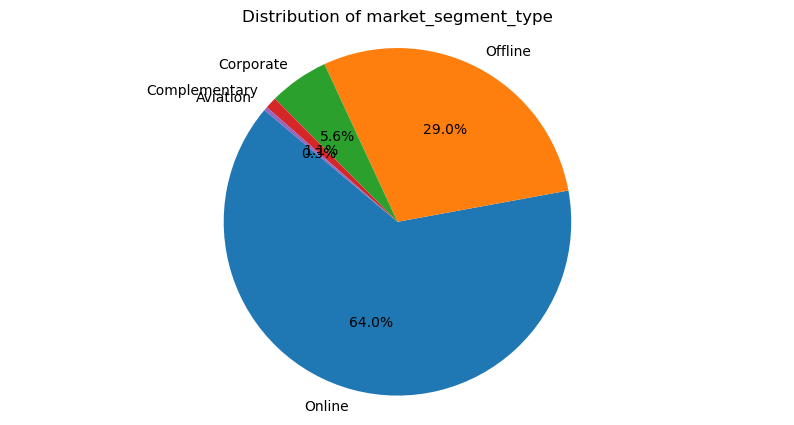


Column: booking_status


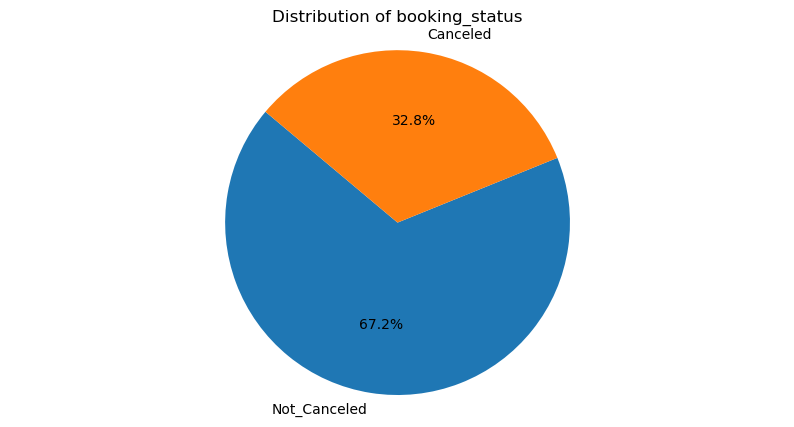

In [30]:
for k in categorical_cols:
    print("Column:", k)
    plt.figure(figsize=(10, 5))
    
    if k != "booking_status":
        category_counts = df[k].value_counts()
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of {k}')
        plt.axis('equal')
    else:
        booking_counts = df[k].value_counts()
        plt.pie(booking_counts, labels=booking_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of {k}')
        plt.axis('equal')
    
    plt.show()
    print("")

In [31]:
numerical_var =[]
for l in df.columns:
    if df[l].dtype !="O":
        numerical_var.append(l)       

In [32]:
print(numerical_var)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


#Outlier ditection with boxplot

Columns :- no_of_adults


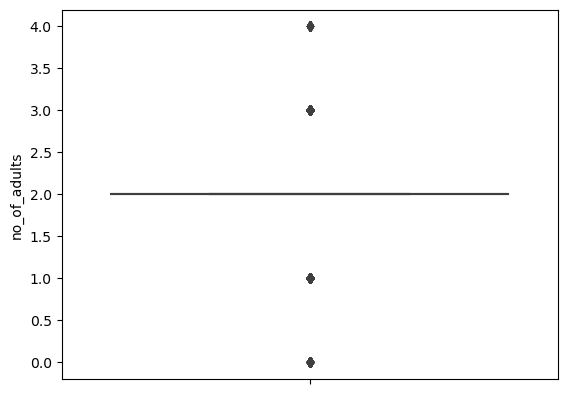


Columns :- no_of_children


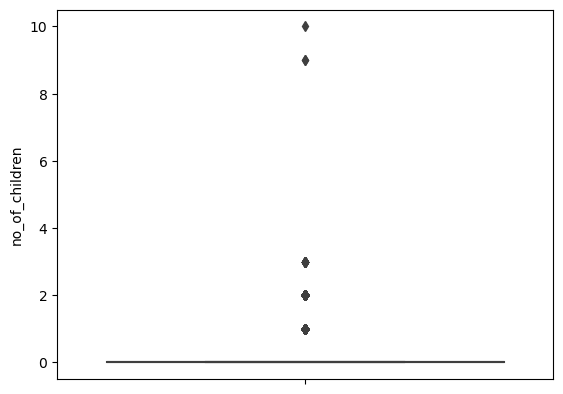


Columns :- no_of_weekend_nights


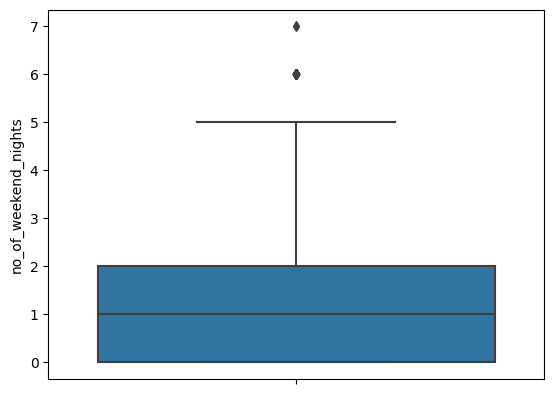


Columns :- no_of_week_nights


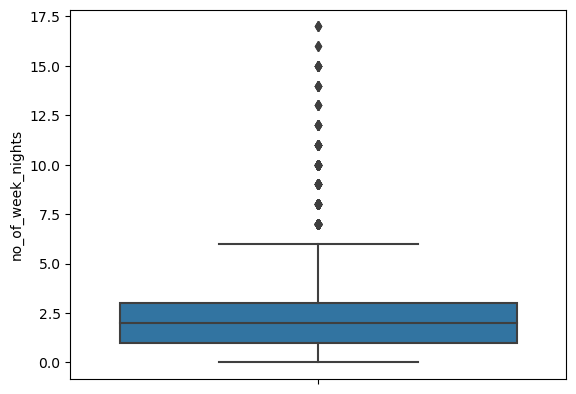


Columns :- required_car_parking_space


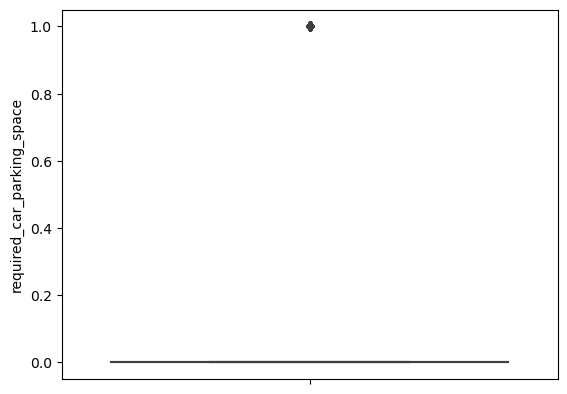


Columns :- lead_time


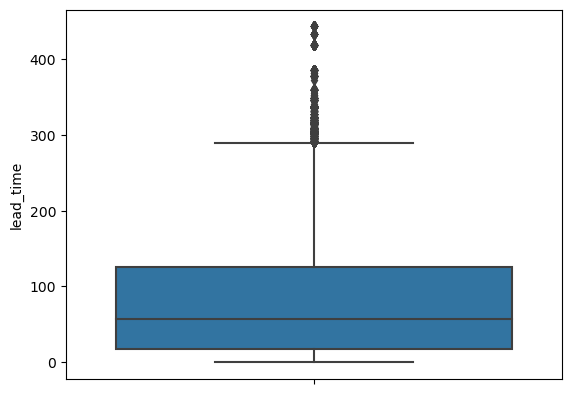


Columns :- repeated_guest


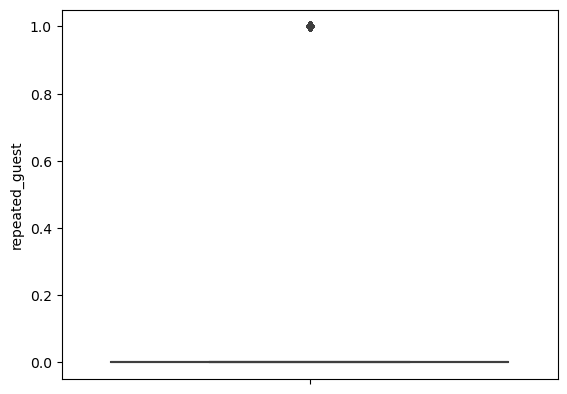


Columns :- no_of_previous_cancellations


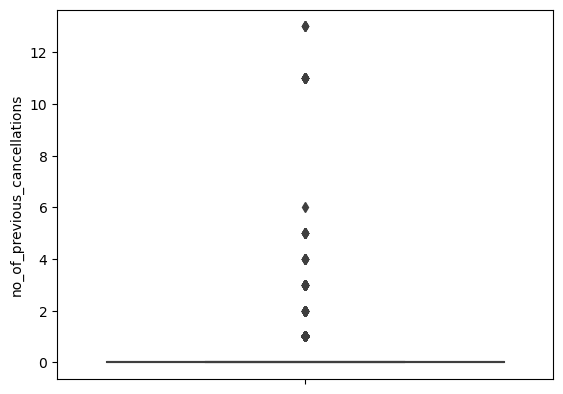


Columns :- no_of_previous_bookings_not_canceled


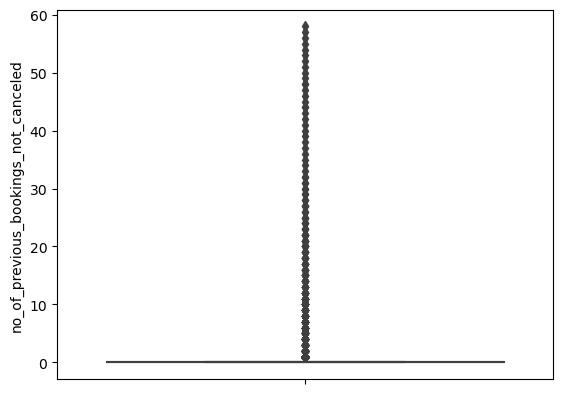


Columns :- avg_price_per_room


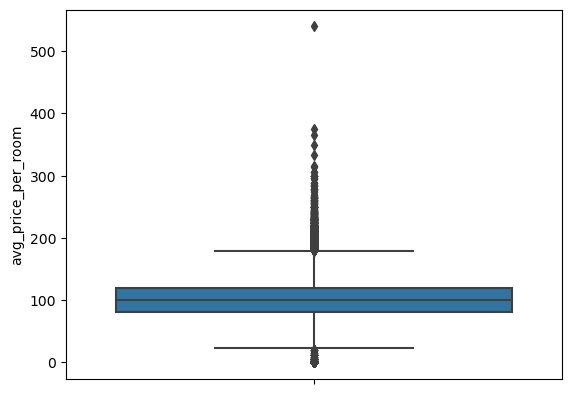


Columns :- no_of_special_requests


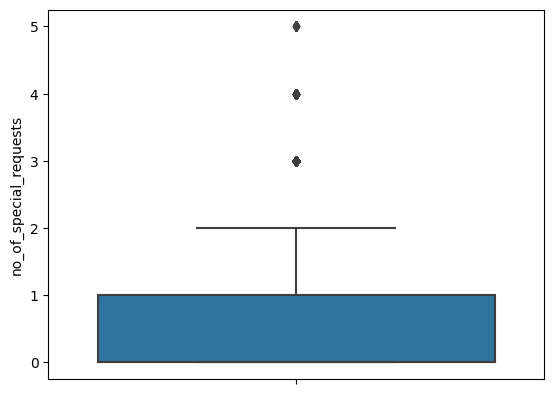

In [33]:
for m in numerical_var:
    print("Columns :-",m)
    sns.boxplot(y = m,data = df)
    plt.show()
    print("")

# Outlier removal with Z_Score

In [34]:
from scipy.stats import zscore

In [35]:
z_score_lead_time = zscore(df["lead_time"])
z_score_lead_time

0        1.614896
1       -0.933701
2       -0.980250
3        1.463610
4       -0.433291
           ...   
36270   -0.002706
36271    1.661446
36272    0.730452
36273   -0.258730
36274    1.417060
Name: lead_time, Length: 36275, dtype: float64

In [36]:
df= df[(z_score_lead_time > -3) & (z_score_lead_time < 3)]

In [37]:
df.shape

(35899, 15)

In [38]:
z_score_no_of_previous_booking_not_canceled = zscore(df["no_of_previous_bookings_not_canceled"])
z_score_no_of_previous_booking_not_canceled

0       -0.087917
1       -0.087917
2       -0.087917
3       -0.087917
4       -0.087917
           ...   
36270   -0.087917
36271   -0.087917
36272   -0.087917
36273   -0.087917
36274   -0.087917
Name: no_of_previous_bookings_not_canceled, Length: 35899, dtype: float64

In [39]:
df= df[(z_score_no_of_previous_booking_not_canceled > -3) & (z_score_no_of_previous_booking_not_canceled < 3)]

In [40]:
df.shape

(35632, 15)

In [41]:
z_score_avg_price_per_room = zscore(df["avg_price_per_room"])
z_score_avg_price_per_room

0       -1.109978
1        0.081111
2       -1.252863
3       -0.109783
4       -0.266957
           ...   
36270    1.827736
36271   -0.368405
36272   -0.155792
36273   -0.266957
36274    1.652559
Name: avg_price_per_room, Length: 35632, dtype: float64

In [42]:
df=df[(z_score_avg_price_per_room > -3) & (z_score_avg_price_per_room < 3)]

In [43]:
df.shape

(35275, 15)

In [44]:
z_score_no_of_week_nights = zscore(df["no_of_week_nights"])
z_score_no_of_week_nights

0       -0.151135
1        0.556779
2       -0.859050
3       -0.151135
4       -0.859050
           ...   
36270    2.680521
36271    0.556779
36272    2.680521
36273    0.556779
36274   -0.151135
Name: no_of_week_nights, Length: 35275, dtype: float64

In [45]:
df = df[(z_score_no_of_week_nights > -3) & (z_score_no_of_week_nights < 3 )]

In [46]:
df.shape

(34959, 15)

In [47]:
z_score_no_of_weekend_nights= zscore(df["no_of_weekend_nights"])
z_score_no_of_weekend_nights

0        0.248227
1        1.446645
2        1.446645
3       -0.950192
4        0.248227
           ...   
36270    1.446645
36271    0.248227
36272    1.446645
36273   -0.950192
36274    0.248227
Name: no_of_weekend_nights, Length: 34959, dtype: float64

In [48]:
df=df[(z_score_no_of_weekend_nights > -3) & (z_score_no_of_weekend_nights) < 3]

In [49]:
df.shape

(34959, 15)

# Histogram

Columns :- no_of_adults


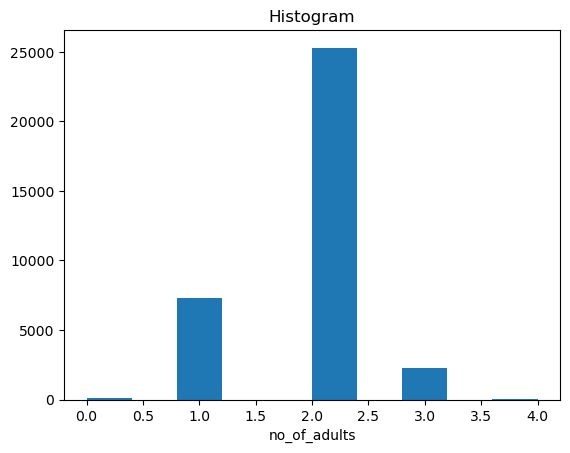


Columns :- no_of_children


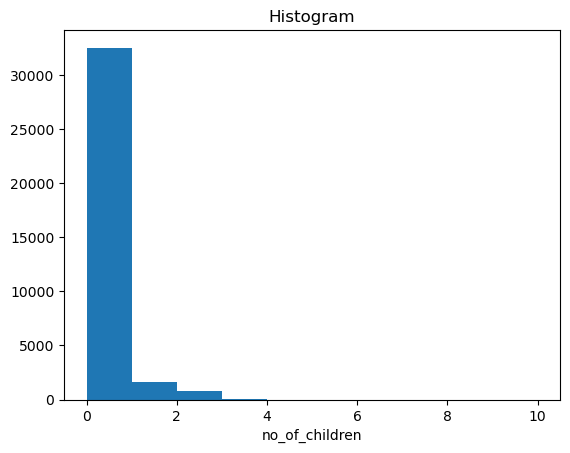


Columns :- no_of_weekend_nights


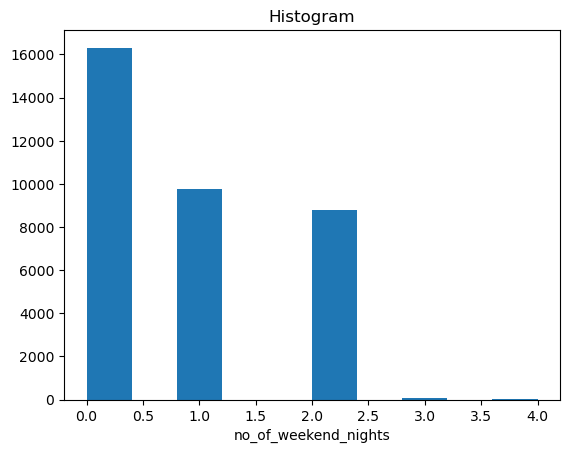


Columns :- no_of_week_nights


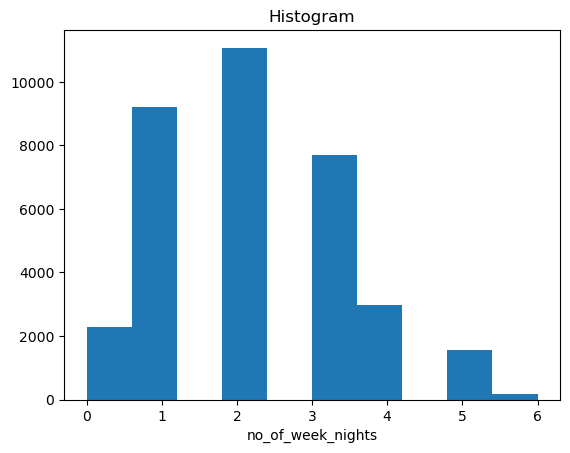


Columns :- required_car_parking_space


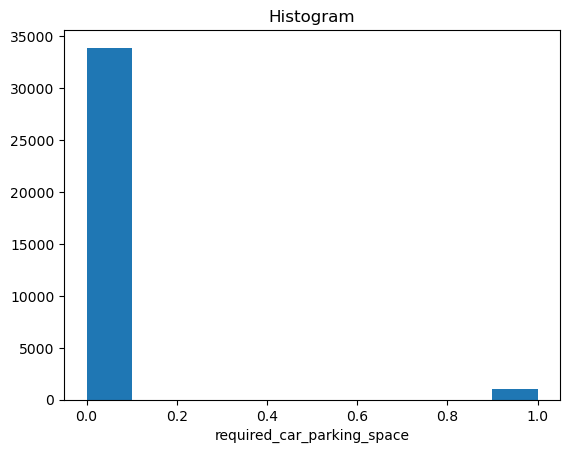


Columns :- lead_time


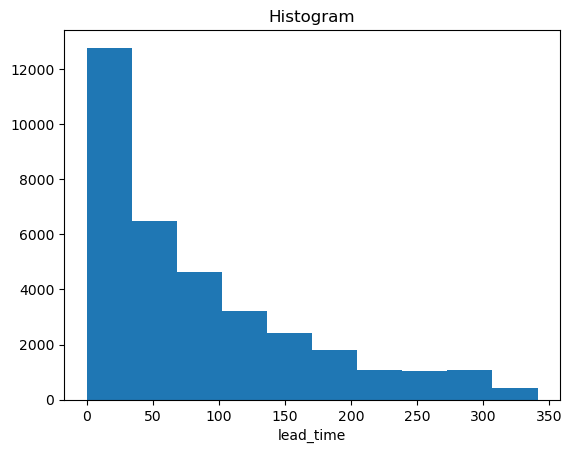


Columns :- repeated_guest


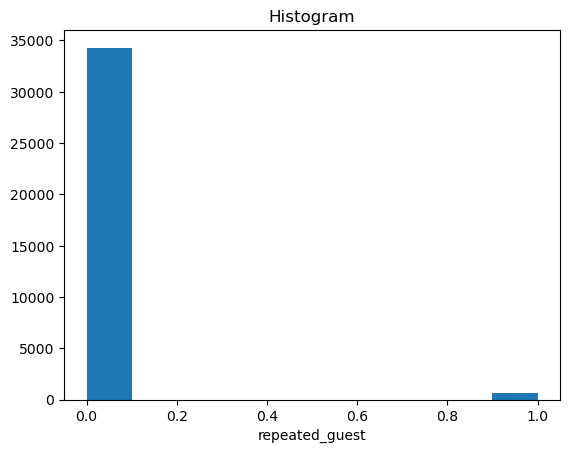


Columns :- no_of_previous_cancellations


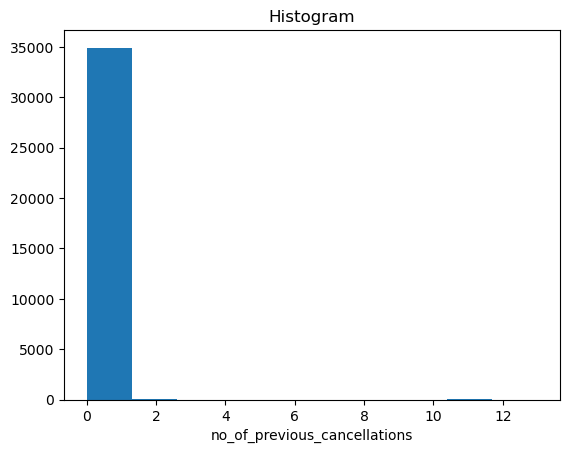


Columns :- no_of_previous_bookings_not_canceled


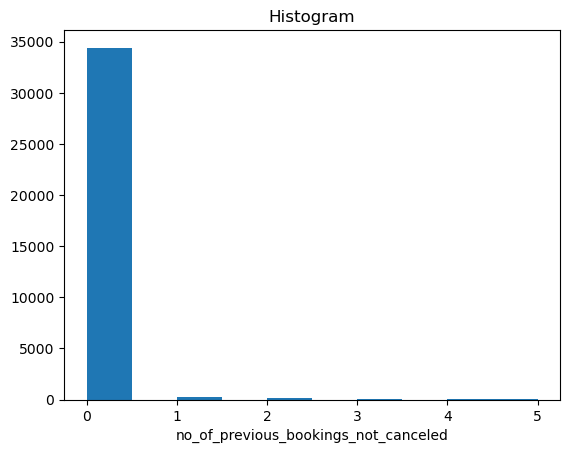


Columns :- avg_price_per_room


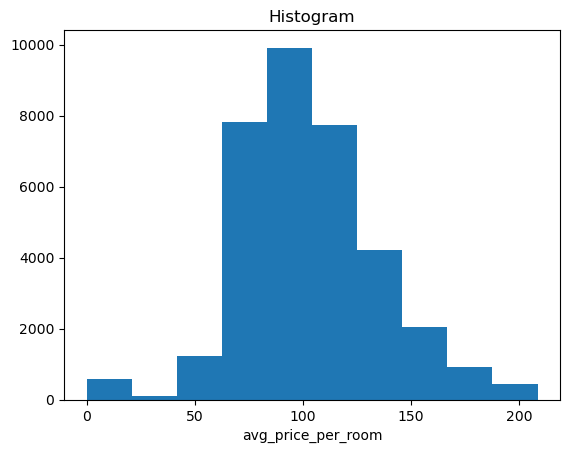


Columns :- no_of_special_requests


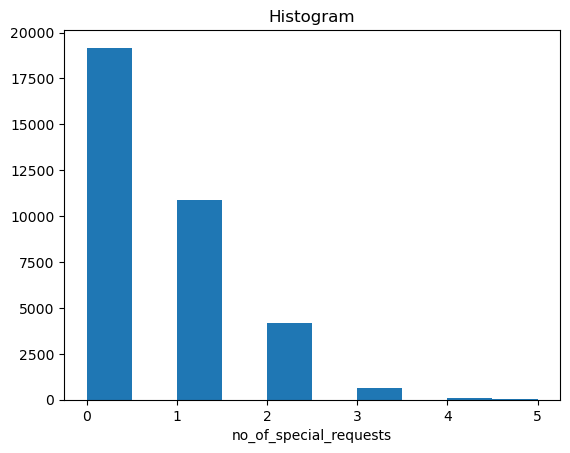

In [50]:
for m in numerical_var:
    print("Columns :-",m)
    plt.hist(df[m])
    plt.title("Histogram")
    plt.xlabel(m)
    plt.show()
    print("")

Columns :- no_of_adults


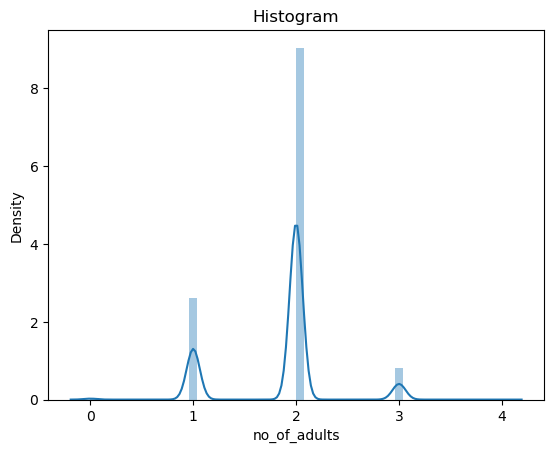


Columns :- no_of_children


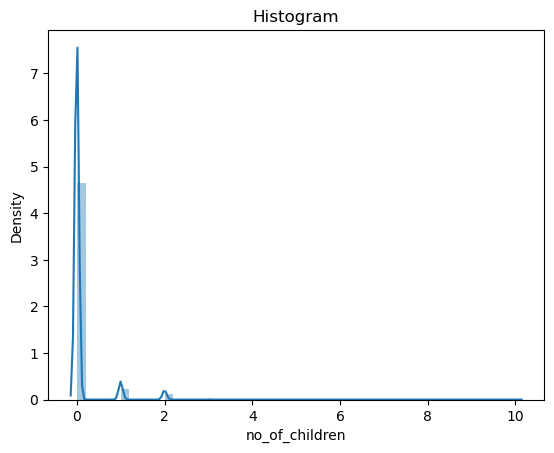


Columns :- no_of_weekend_nights


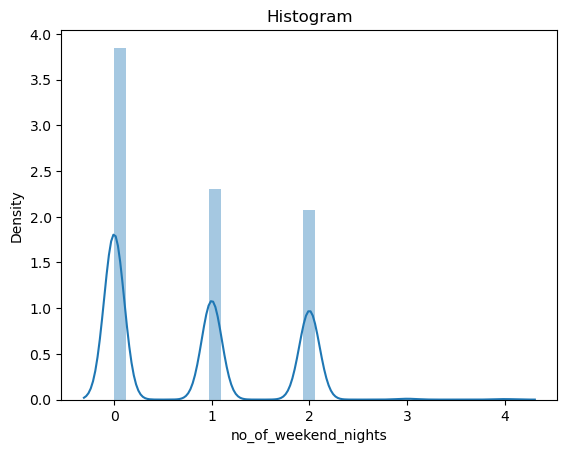


Columns :- no_of_week_nights


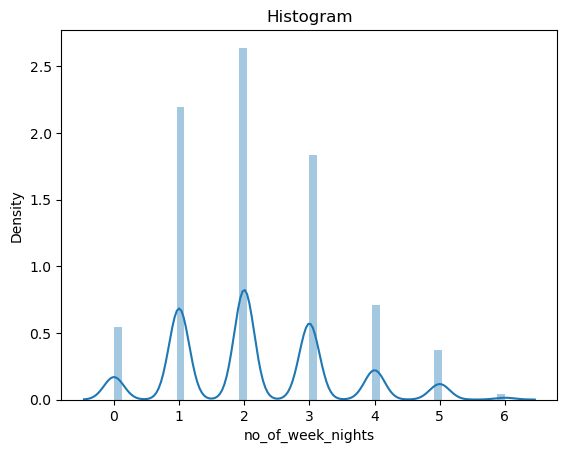


Columns :- required_car_parking_space


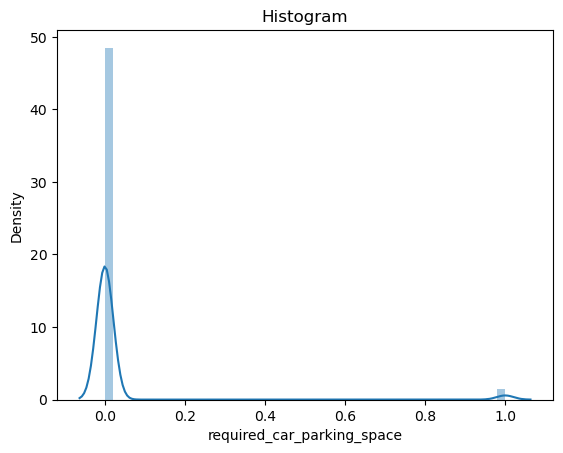


Columns :- lead_time


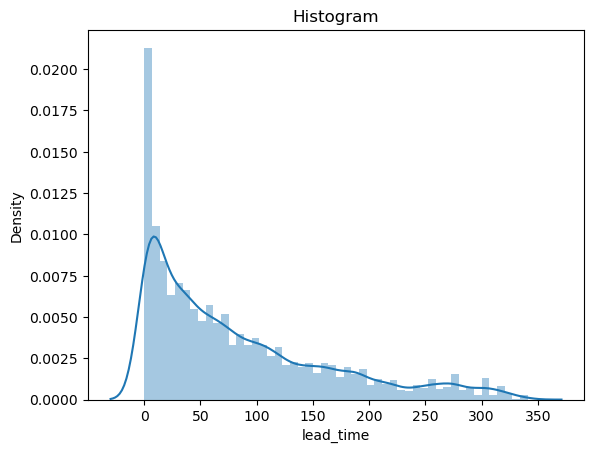


Columns :- repeated_guest


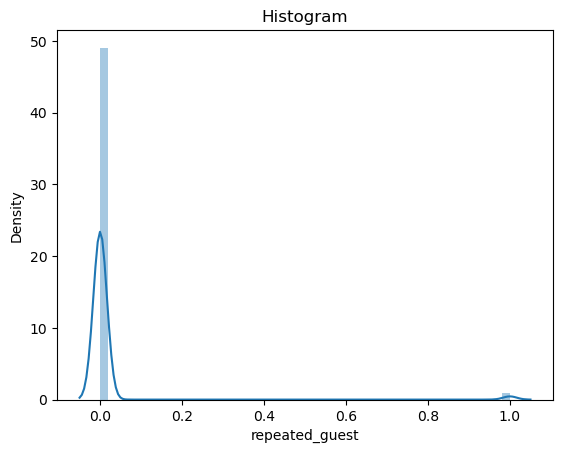


Columns :- no_of_previous_cancellations


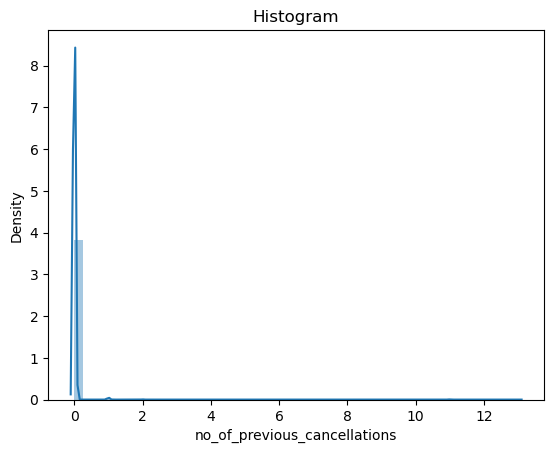


Columns :- no_of_previous_bookings_not_canceled


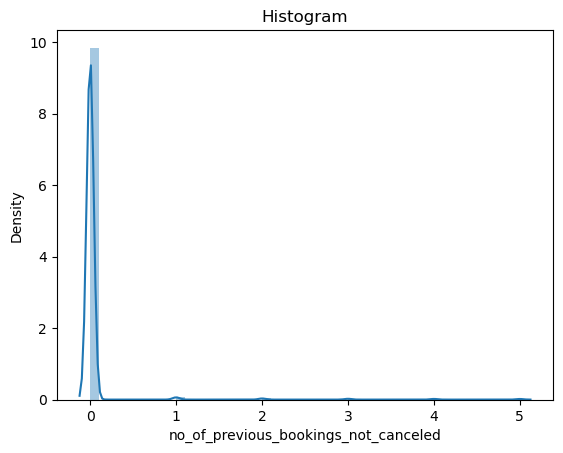


Columns :- avg_price_per_room


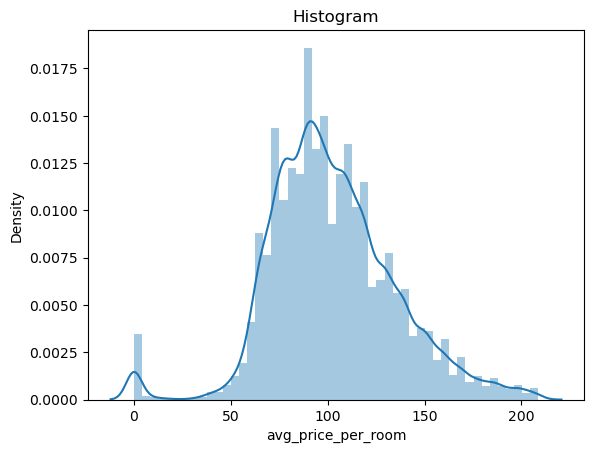


Columns :- no_of_special_requests


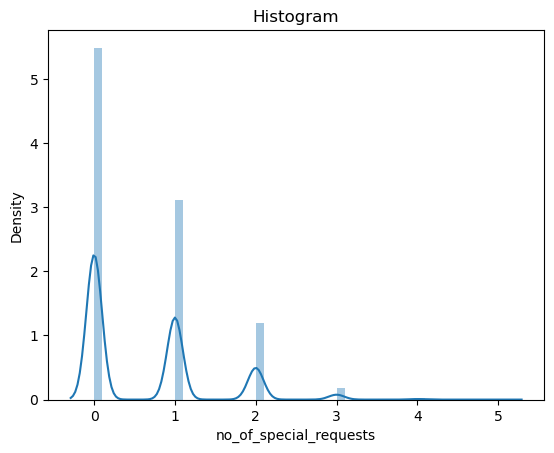

In [51]:
for n in numerical_var:
    print("Columns :-",n)
    sns.distplot(df[n])
    plt.title("Histogram")
    plt.xlabel(n)
    plt.show()
    print("")

# scatterplot

columns:- no_of_adults and no_of_children


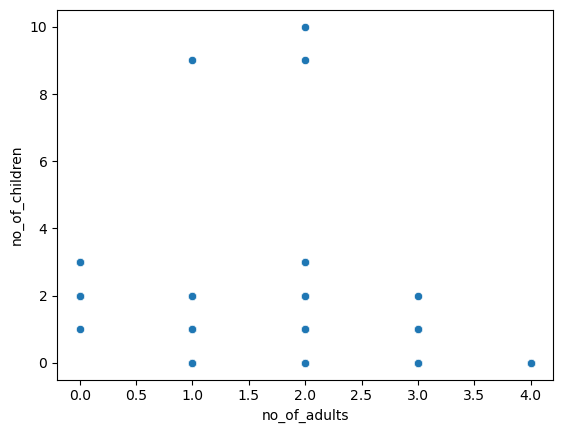


columns:- no_of_adults and no_of_weekend_nights


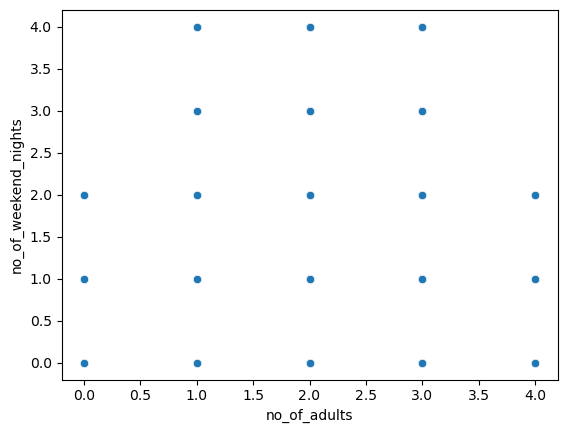


columns:- no_of_adults and no_of_week_nights


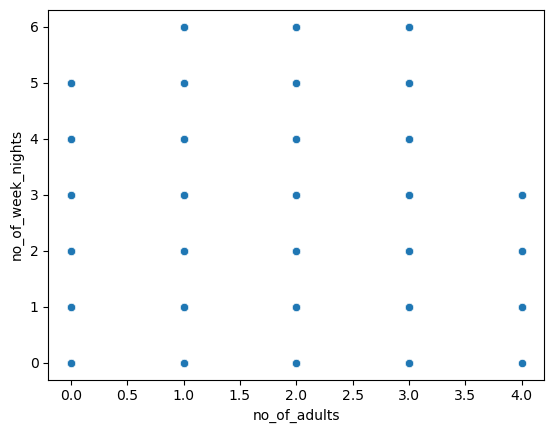


columns:- no_of_adults and required_car_parking_space


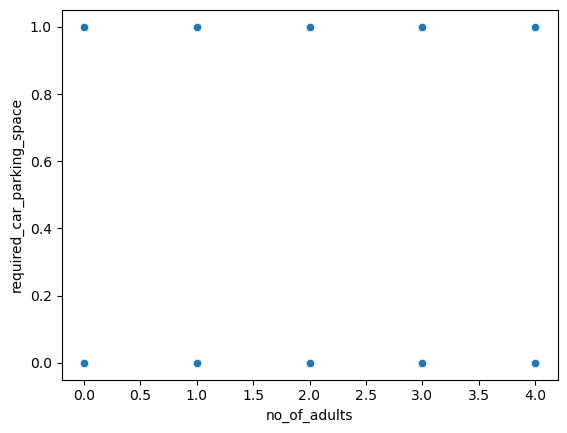


columns:- no_of_adults and lead_time


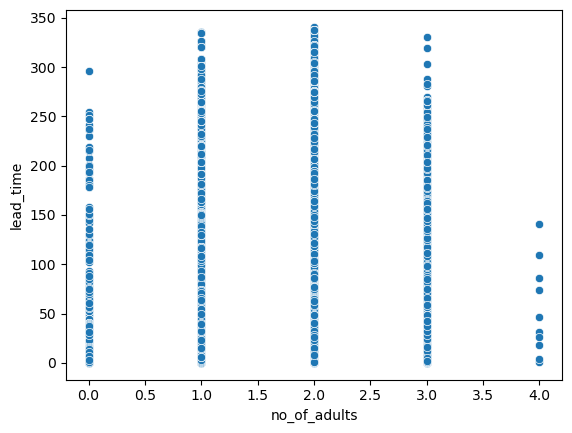


columns:- no_of_adults and repeated_guest


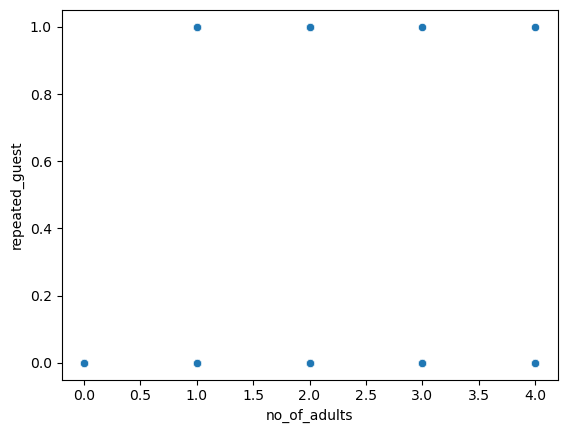


columns:- no_of_adults and no_of_previous_cancellations


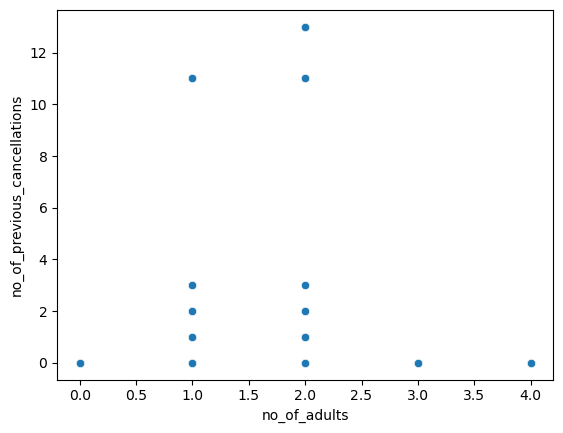


columns:- no_of_adults and no_of_previous_bookings_not_canceled


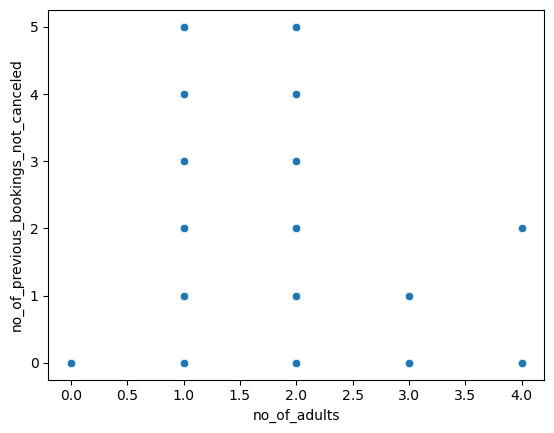


columns:- no_of_adults and avg_price_per_room


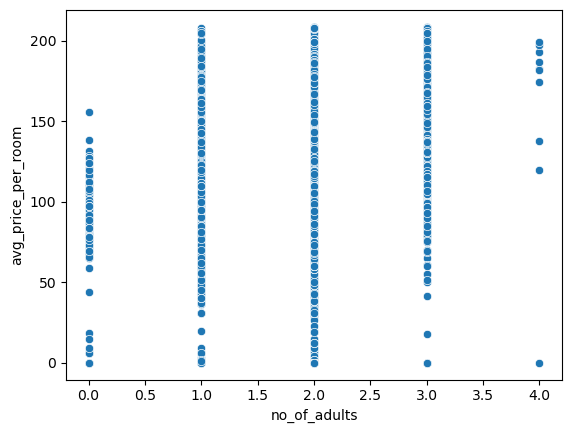


columns:- no_of_adults and no_of_special_requests


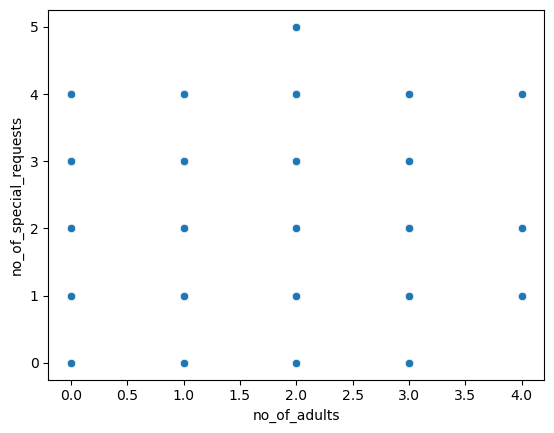


columns:- no_of_children and no_of_adults


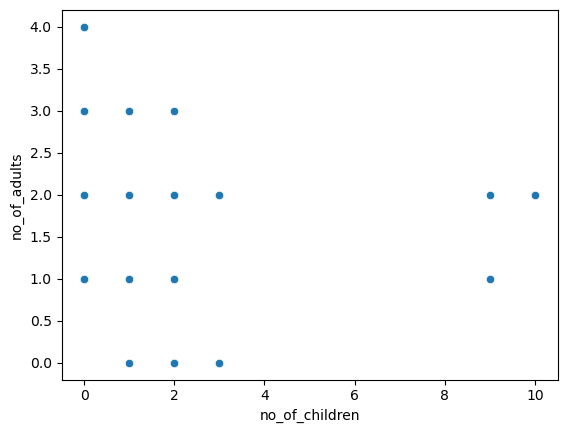


columns:- no_of_children and no_of_weekend_nights


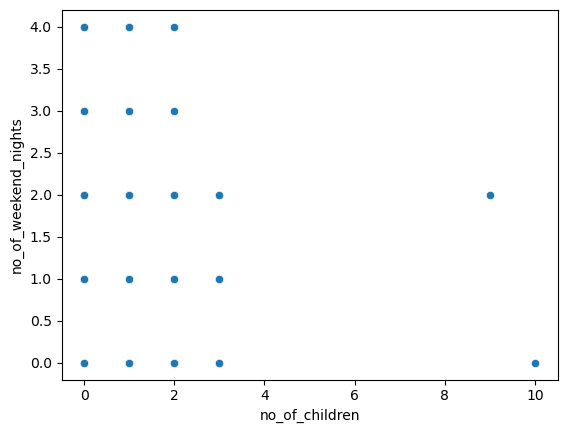


columns:- no_of_children and no_of_week_nights


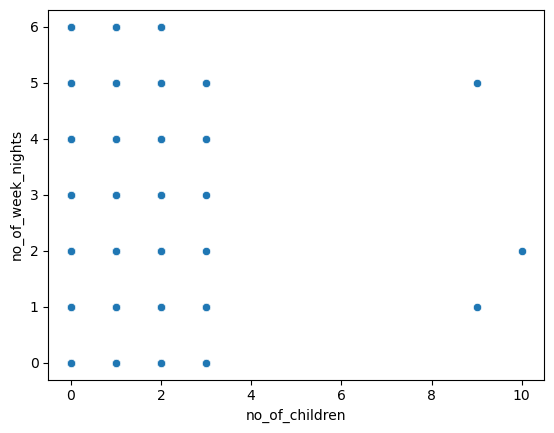


columns:- no_of_children and required_car_parking_space


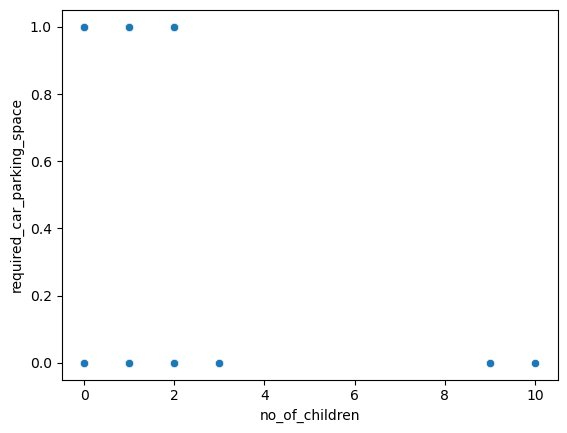


columns:- no_of_children and lead_time


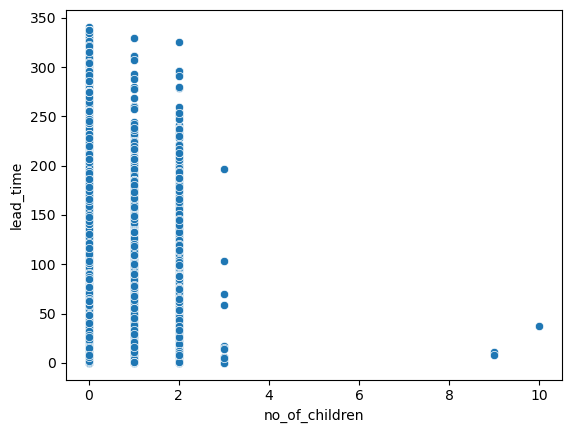


columns:- no_of_children and repeated_guest


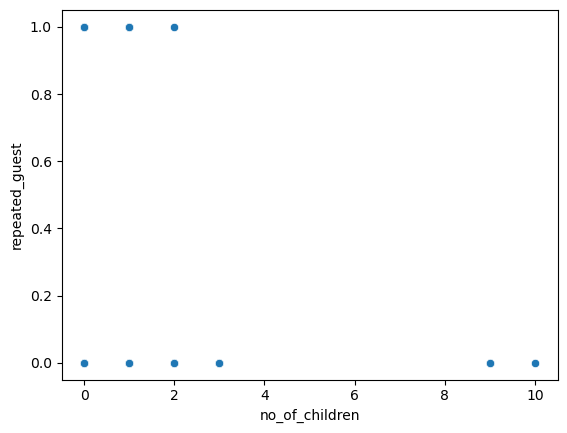


columns:- no_of_children and no_of_previous_cancellations


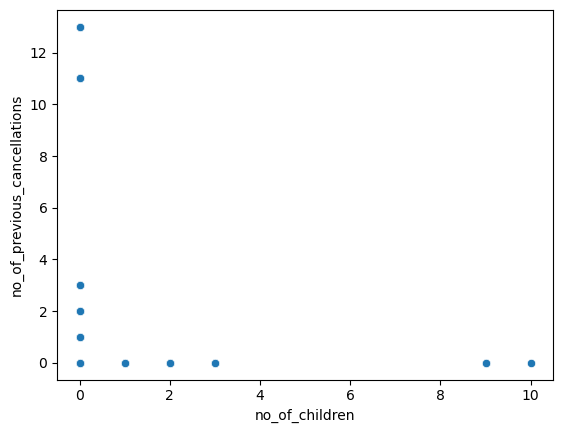


columns:- no_of_children and no_of_previous_bookings_not_canceled


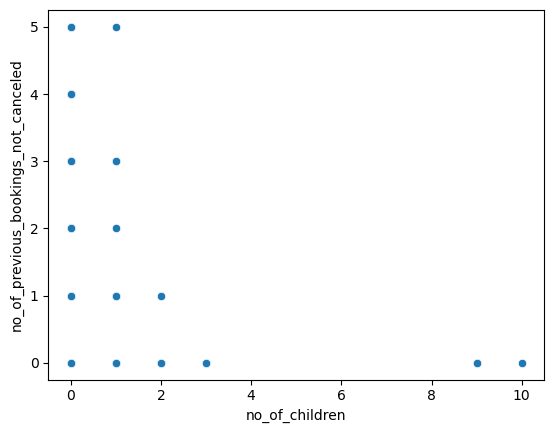


columns:- no_of_children and avg_price_per_room


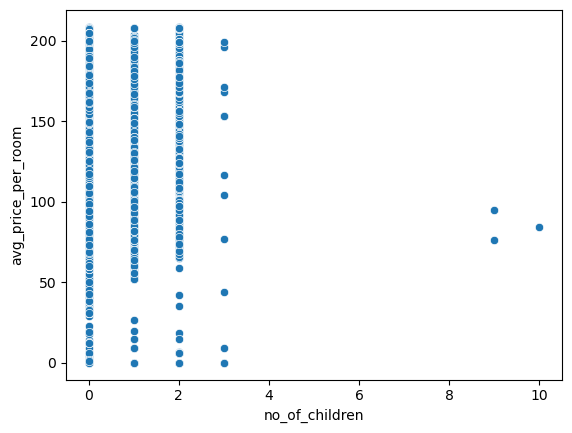


columns:- no_of_children and no_of_special_requests


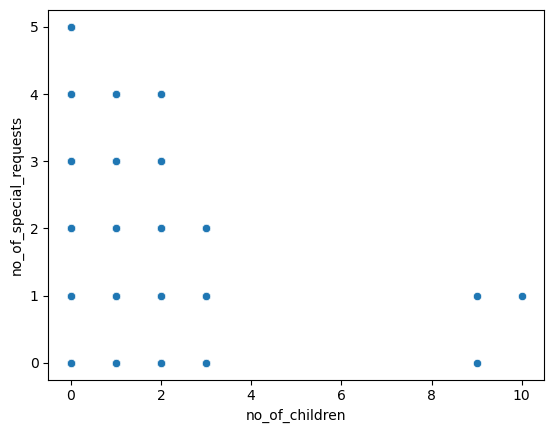


columns:- no_of_weekend_nights and no_of_adults


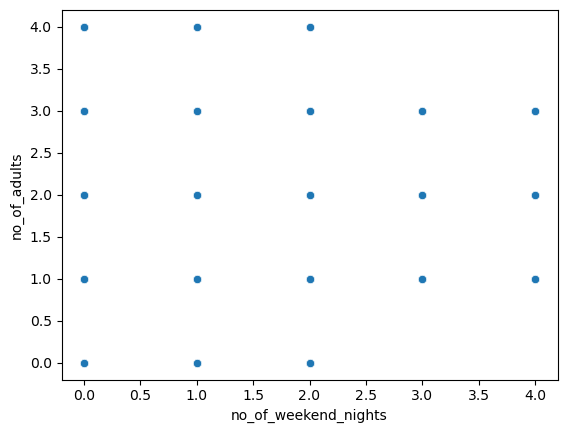


columns:- no_of_weekend_nights and no_of_children


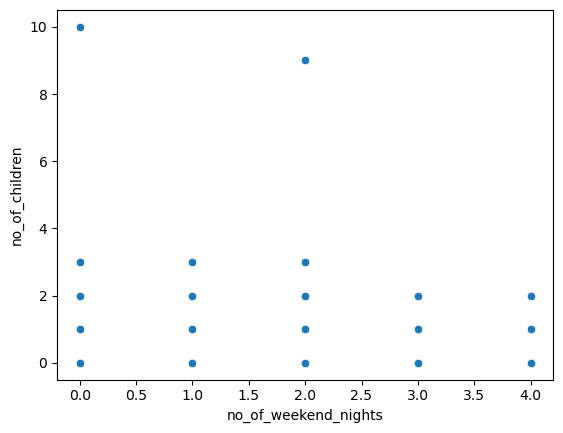


columns:- no_of_weekend_nights and no_of_week_nights


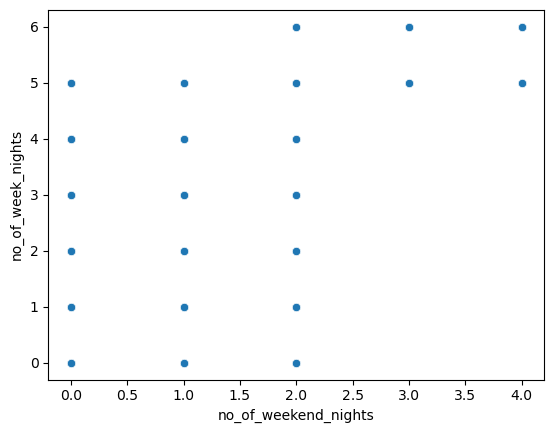


columns:- no_of_weekend_nights and required_car_parking_space


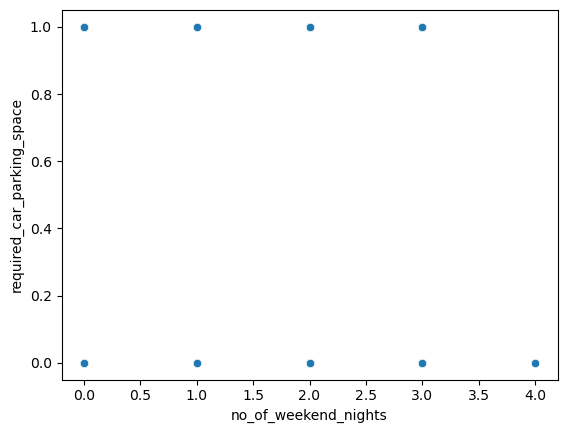


columns:- no_of_weekend_nights and lead_time


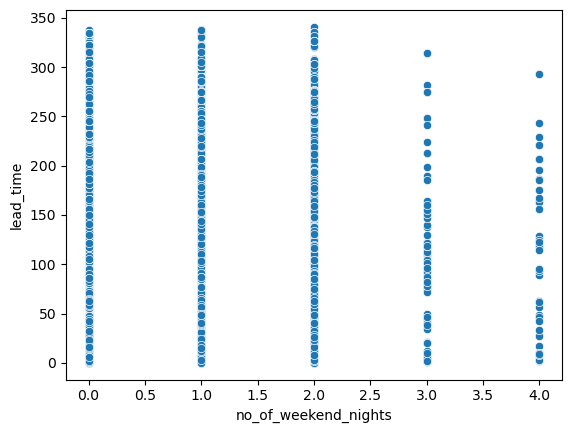


columns:- no_of_weekend_nights and repeated_guest


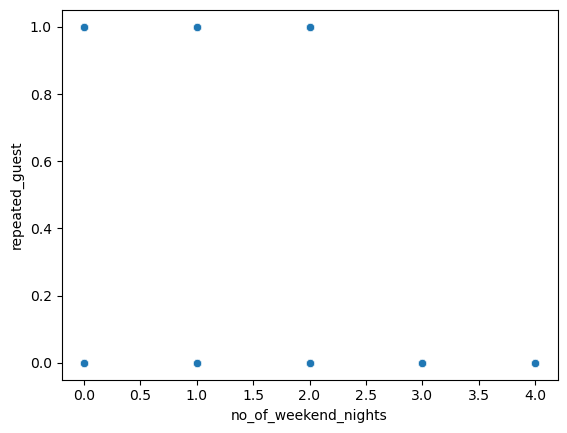


columns:- no_of_weekend_nights and no_of_previous_cancellations


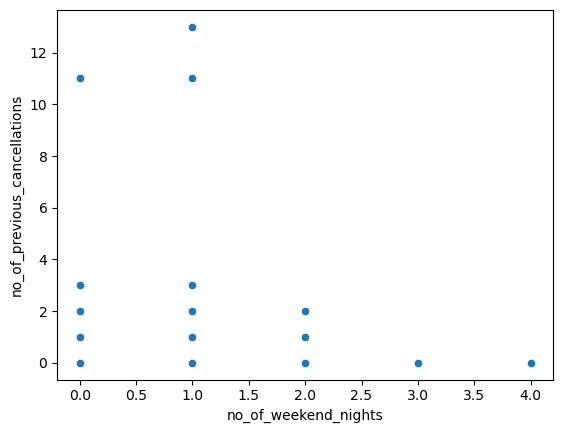


columns:- no_of_weekend_nights and no_of_previous_bookings_not_canceled


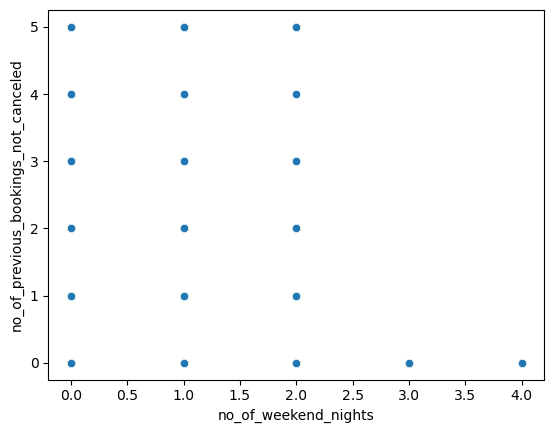


columns:- no_of_weekend_nights and avg_price_per_room


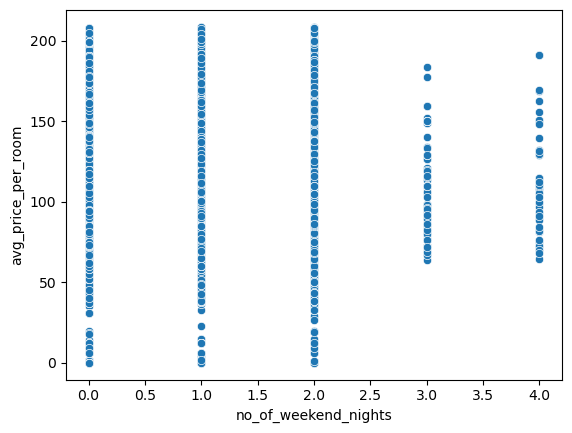


columns:- no_of_weekend_nights and no_of_special_requests


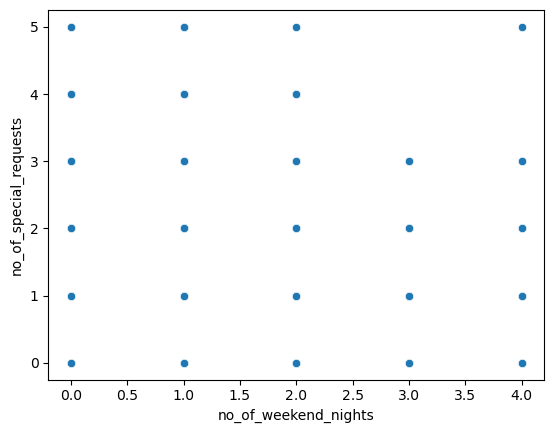


columns:- no_of_week_nights and no_of_adults


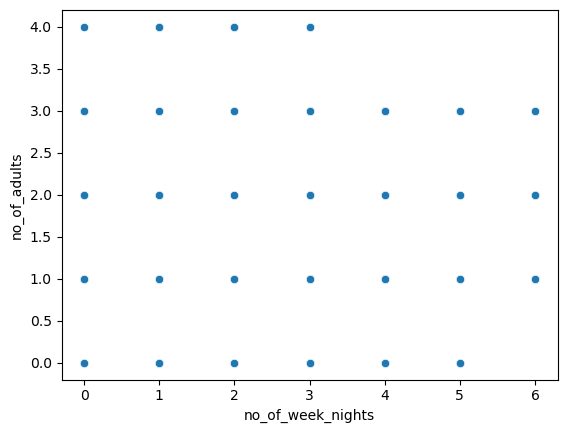


columns:- no_of_week_nights and no_of_children


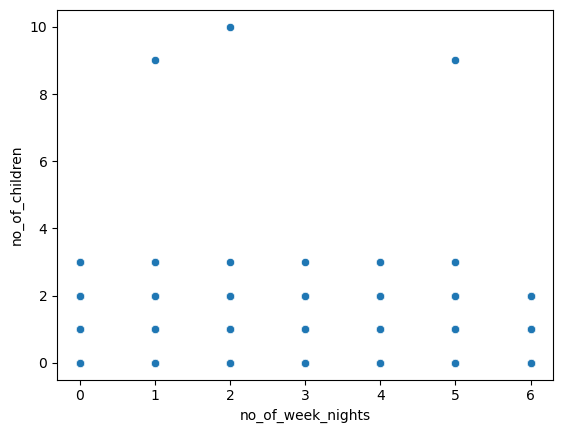


columns:- no_of_week_nights and no_of_weekend_nights


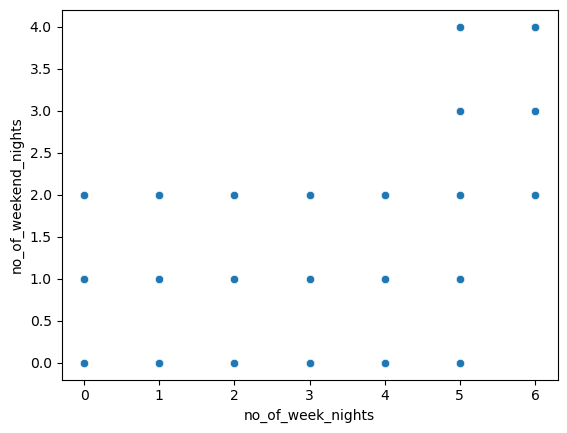


columns:- no_of_week_nights and required_car_parking_space


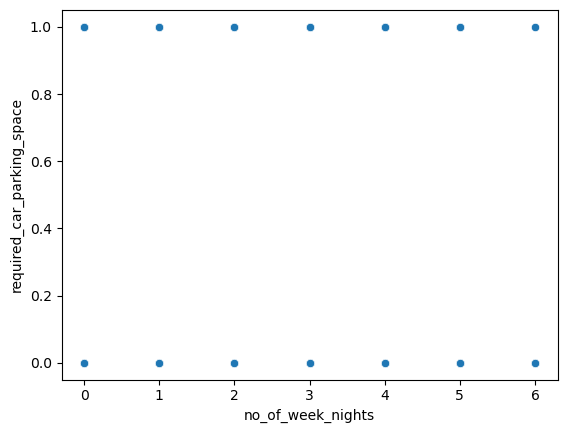


columns:- no_of_week_nights and lead_time


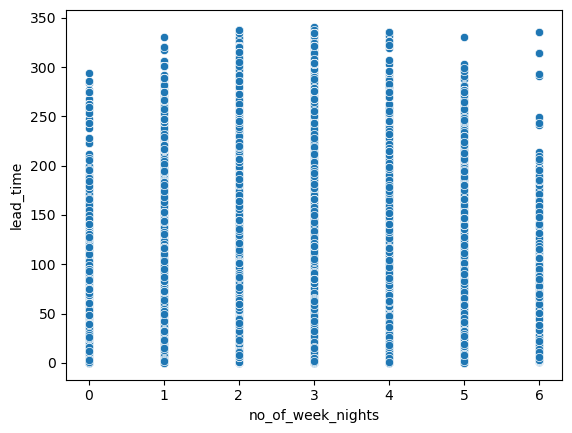


columns:- no_of_week_nights and repeated_guest


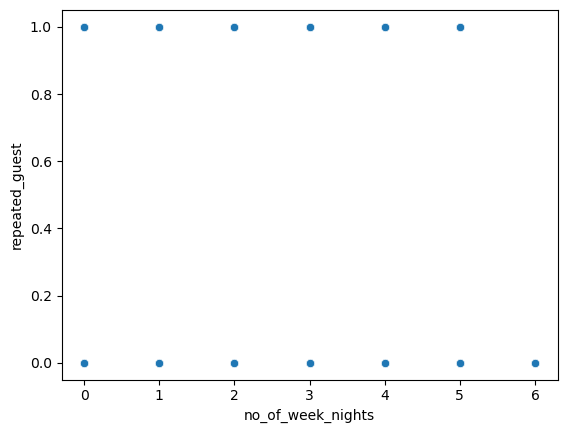


columns:- no_of_week_nights and no_of_previous_cancellations


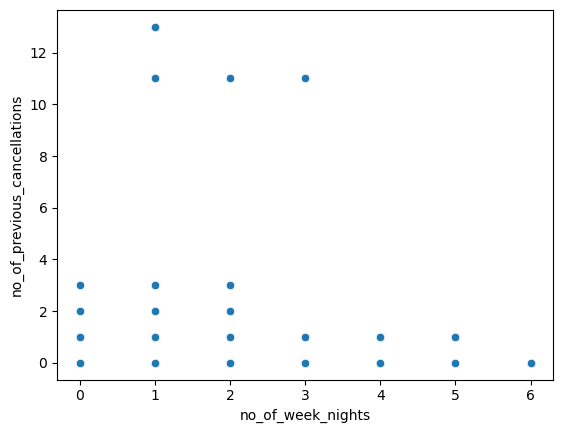


columns:- no_of_week_nights and no_of_previous_bookings_not_canceled


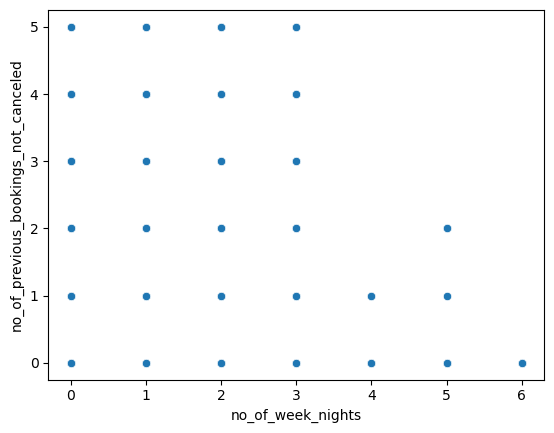


columns:- no_of_week_nights and avg_price_per_room


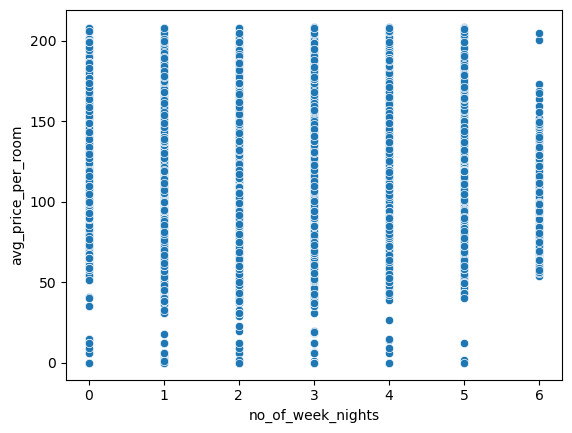


columns:- no_of_week_nights and no_of_special_requests


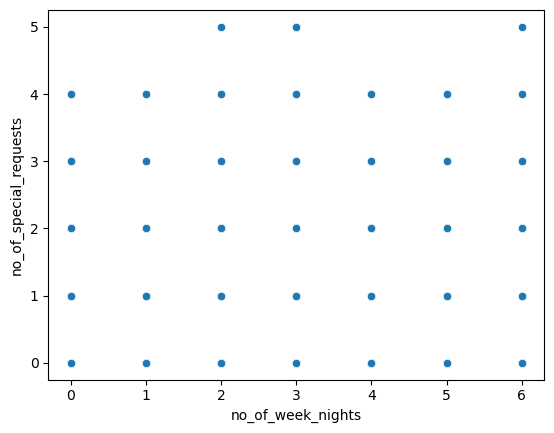


columns:- required_car_parking_space and no_of_adults


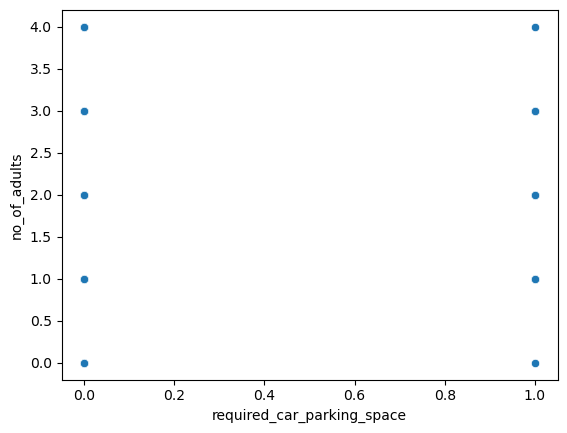


columns:- required_car_parking_space and no_of_children


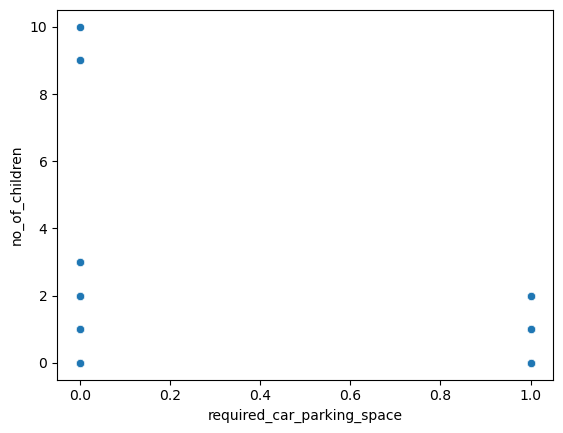


columns:- required_car_parking_space and no_of_weekend_nights


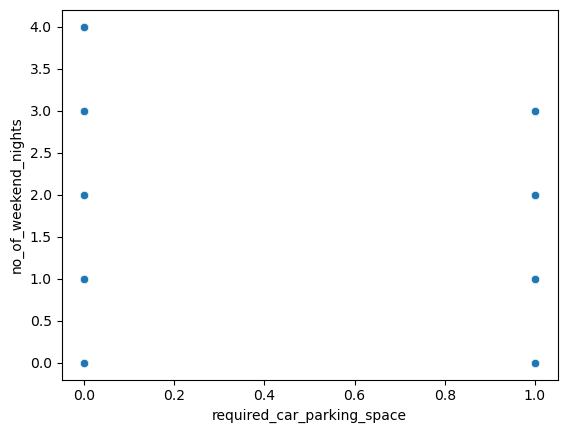


columns:- required_car_parking_space and no_of_week_nights


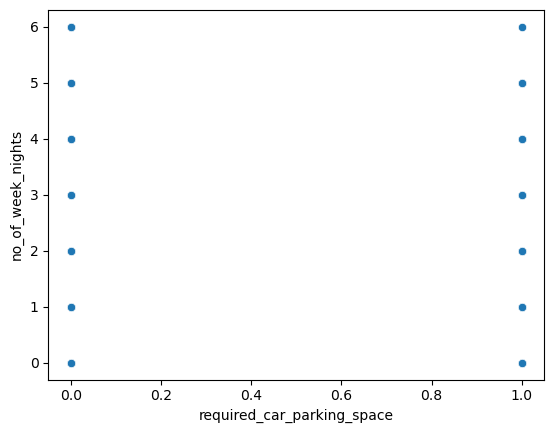


columns:- required_car_parking_space and lead_time


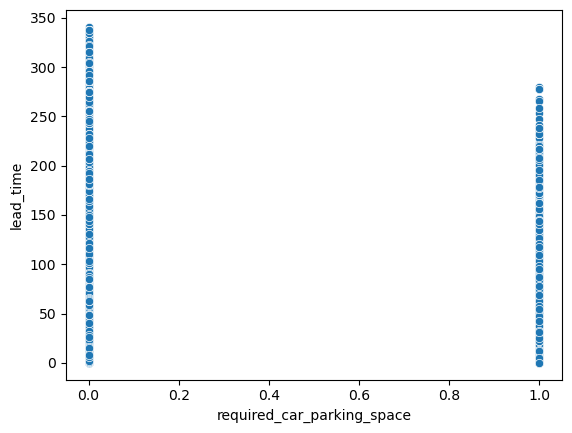


columns:- required_car_parking_space and repeated_guest


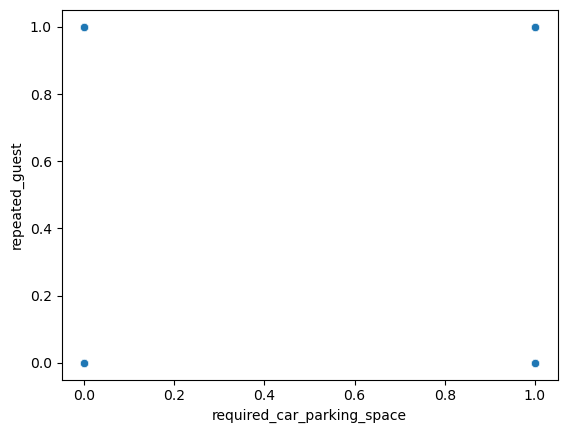


columns:- required_car_parking_space and no_of_previous_cancellations


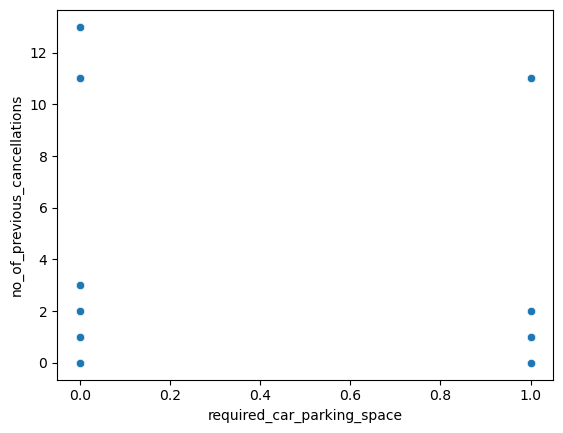


columns:- required_car_parking_space and no_of_previous_bookings_not_canceled


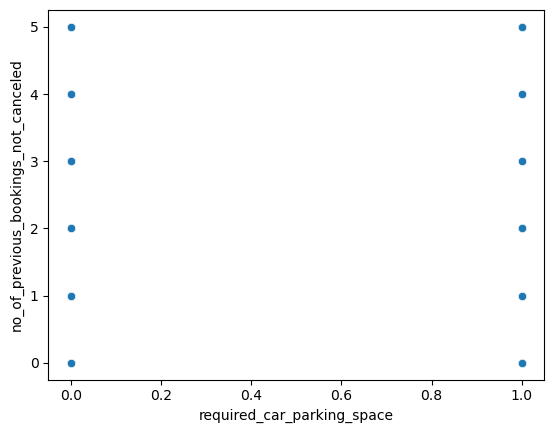


columns:- required_car_parking_space and avg_price_per_room


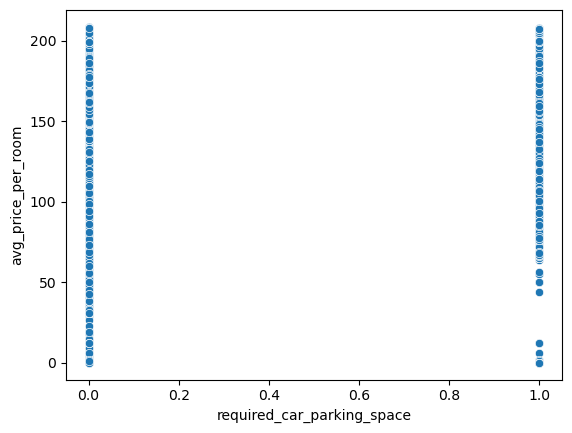


columns:- required_car_parking_space and no_of_special_requests


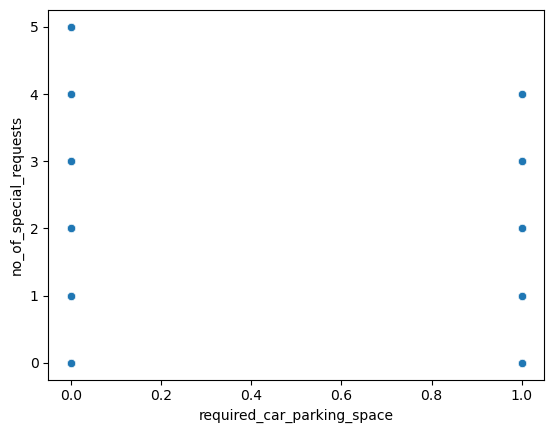


columns:- lead_time and no_of_adults


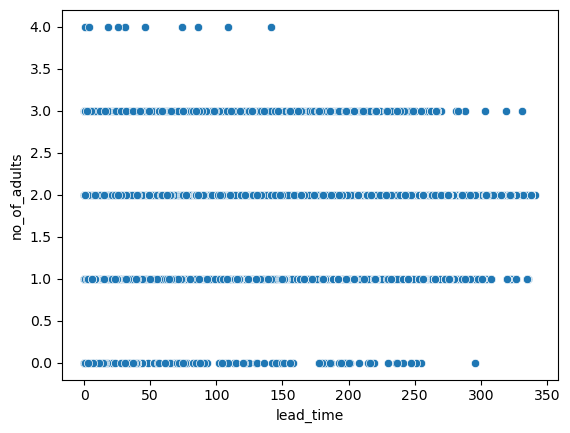


columns:- lead_time and no_of_children


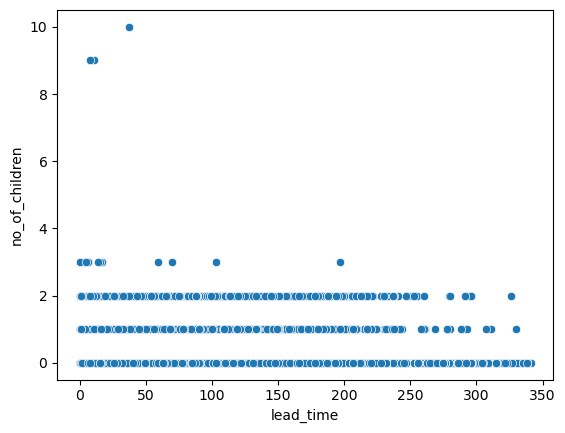


columns:- lead_time and no_of_weekend_nights


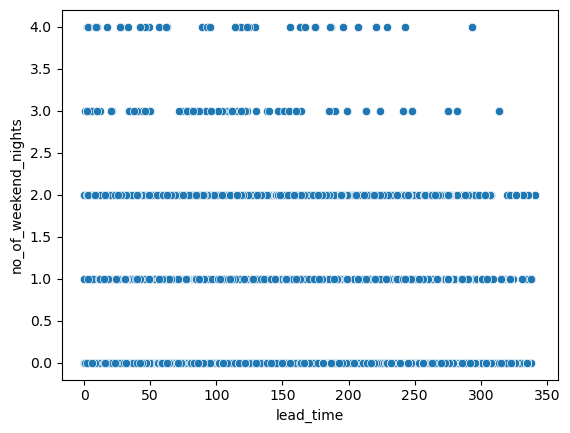


columns:- lead_time and no_of_week_nights


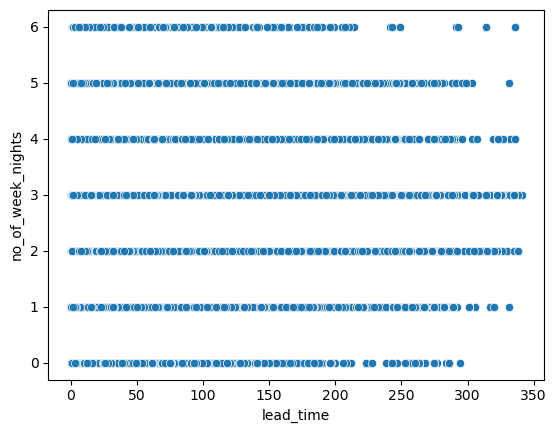


columns:- lead_time and required_car_parking_space


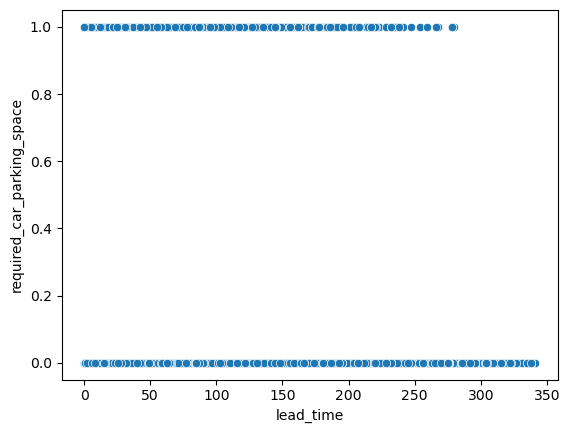


columns:- lead_time and repeated_guest


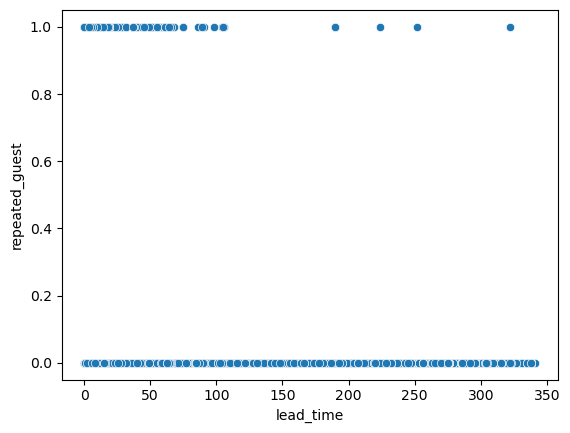


columns:- lead_time and no_of_previous_cancellations


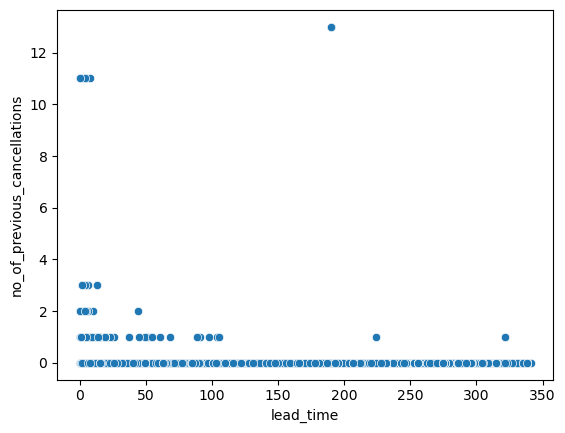


columns:- lead_time and no_of_previous_bookings_not_canceled


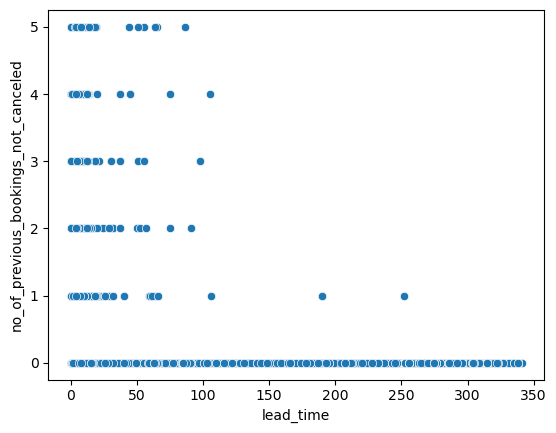


columns:- lead_time and avg_price_per_room


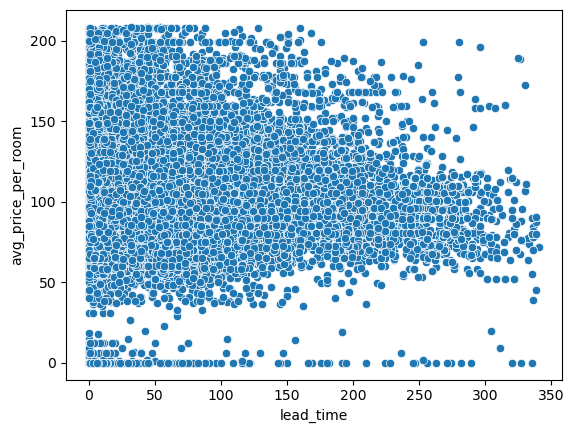


columns:- lead_time and no_of_special_requests


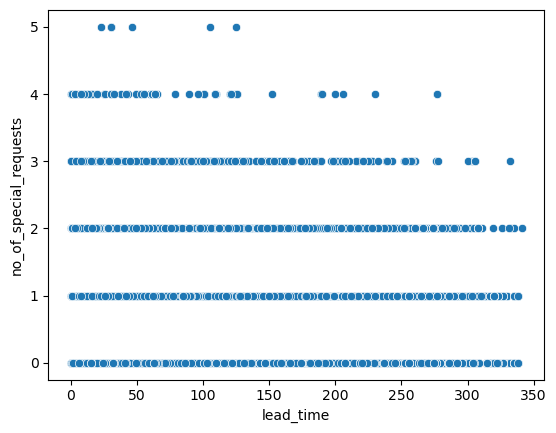


columns:- repeated_guest and no_of_adults


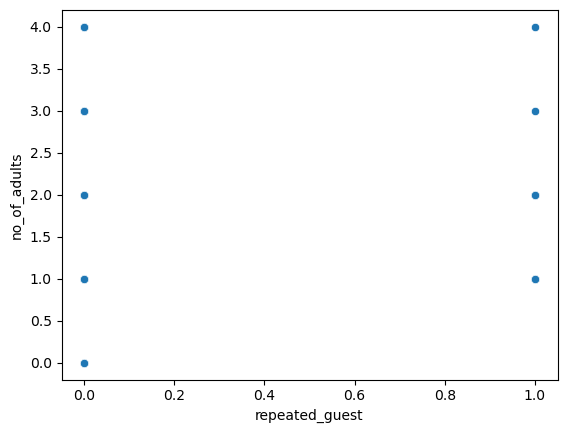


columns:- repeated_guest and no_of_children


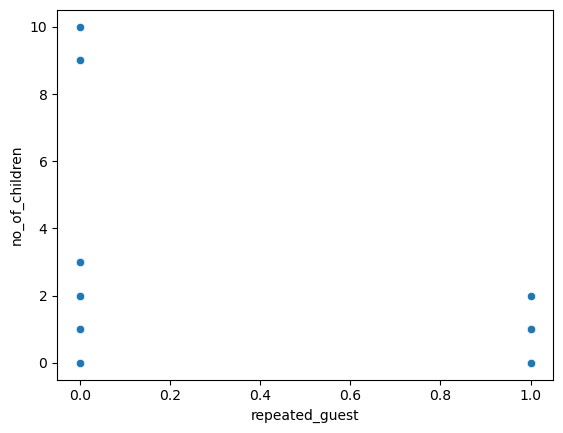


columns:- repeated_guest and no_of_weekend_nights


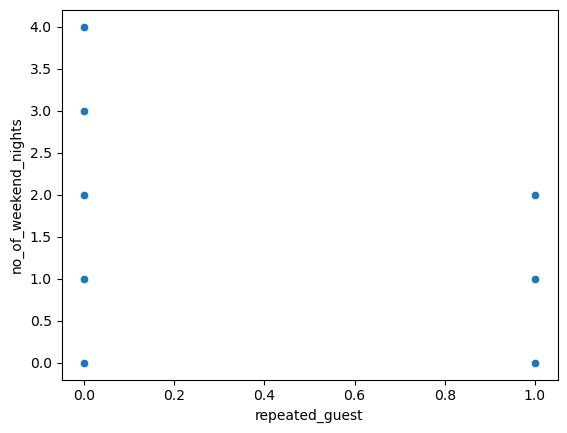


columns:- repeated_guest and no_of_week_nights


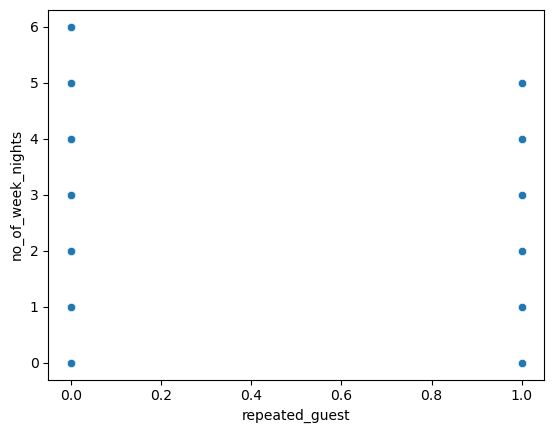


columns:- repeated_guest and required_car_parking_space


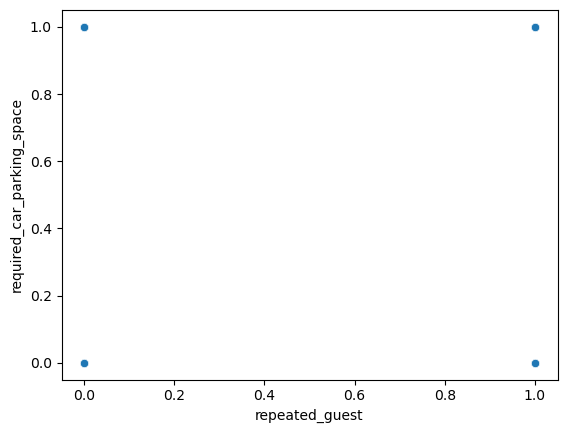


columns:- repeated_guest and lead_time


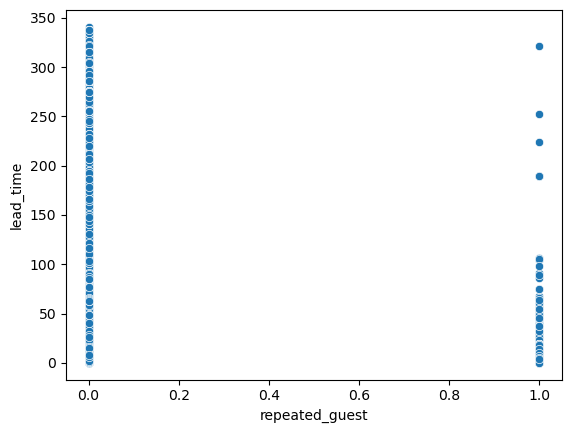


columns:- repeated_guest and no_of_previous_cancellations


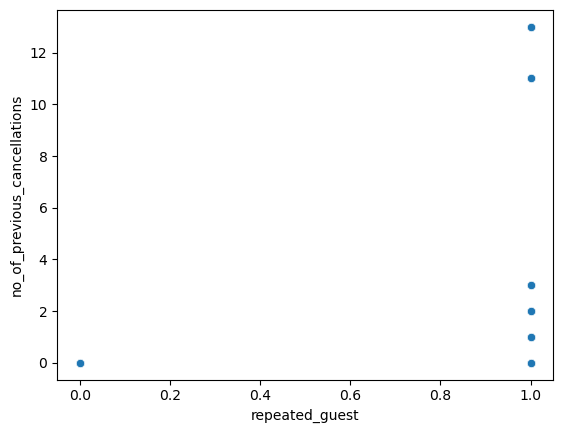


columns:- repeated_guest and no_of_previous_bookings_not_canceled


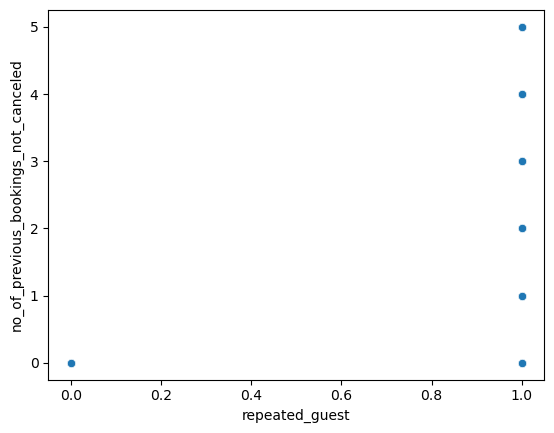


columns:- repeated_guest and avg_price_per_room


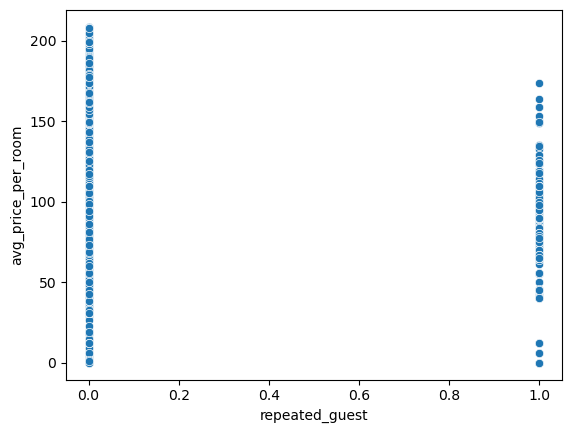


columns:- repeated_guest and no_of_special_requests


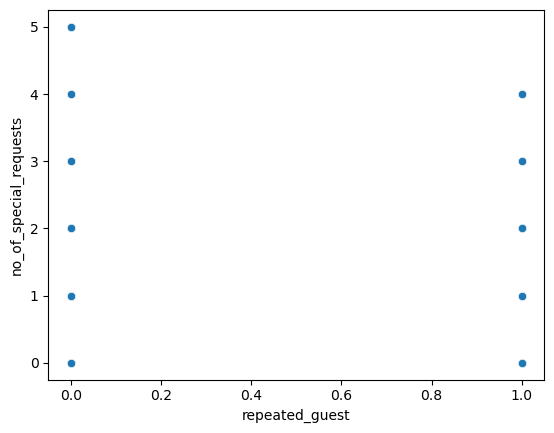


columns:- no_of_previous_cancellations and no_of_adults


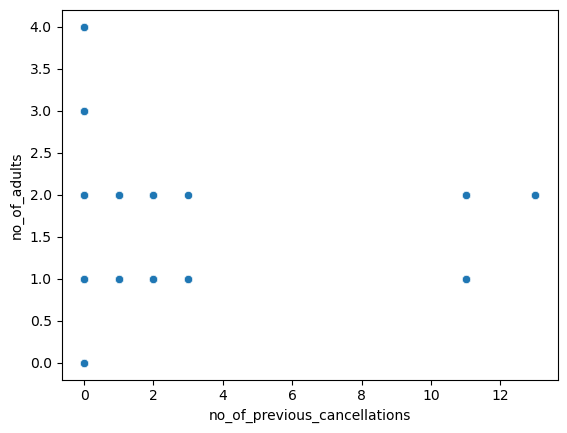


columns:- no_of_previous_cancellations and no_of_children


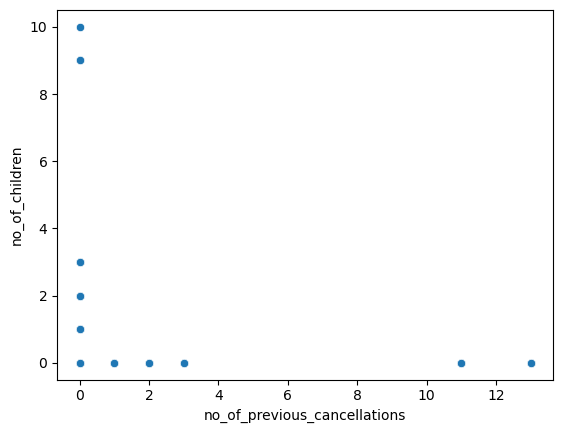


columns:- no_of_previous_cancellations and no_of_weekend_nights


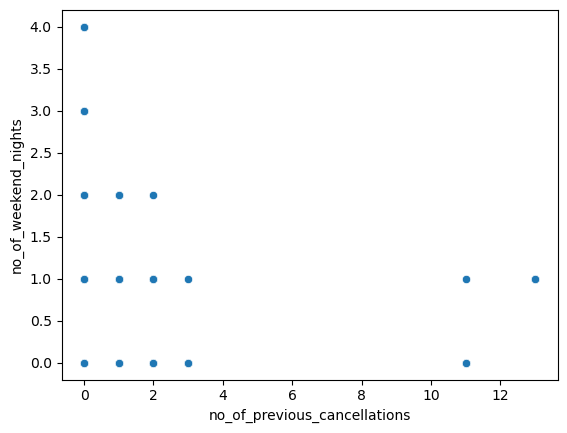


columns:- no_of_previous_cancellations and no_of_week_nights


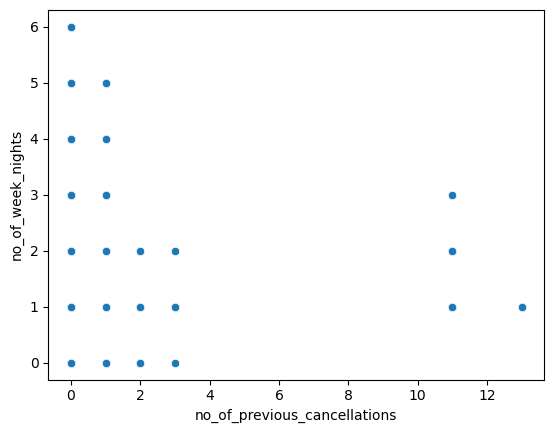


columns:- no_of_previous_cancellations and required_car_parking_space


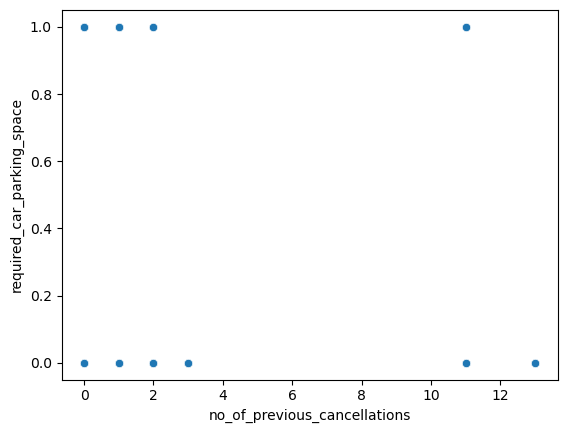


columns:- no_of_previous_cancellations and lead_time


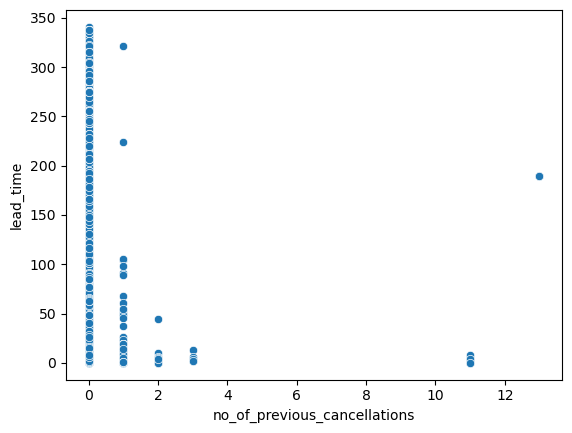


columns:- no_of_previous_cancellations and repeated_guest


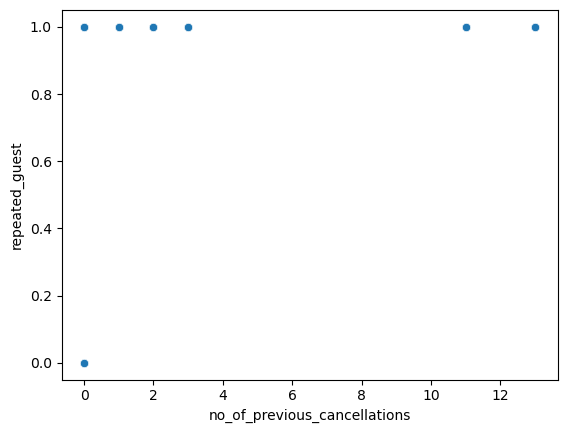


columns:- no_of_previous_cancellations and no_of_previous_bookings_not_canceled


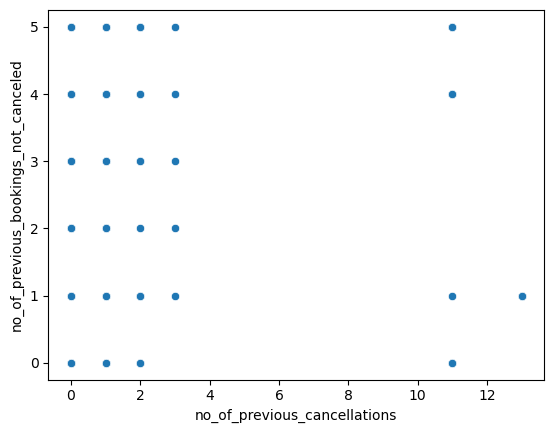


columns:- no_of_previous_cancellations and avg_price_per_room


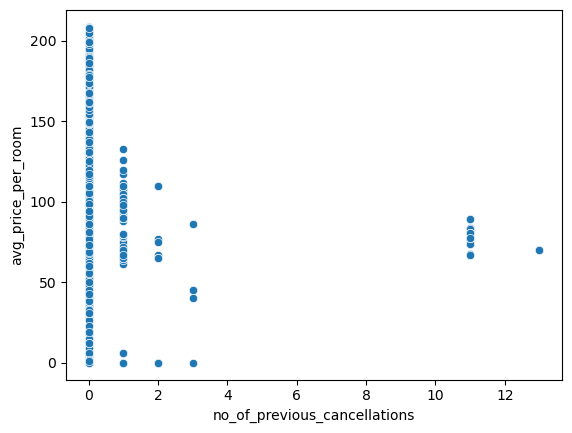


columns:- no_of_previous_cancellations and no_of_special_requests


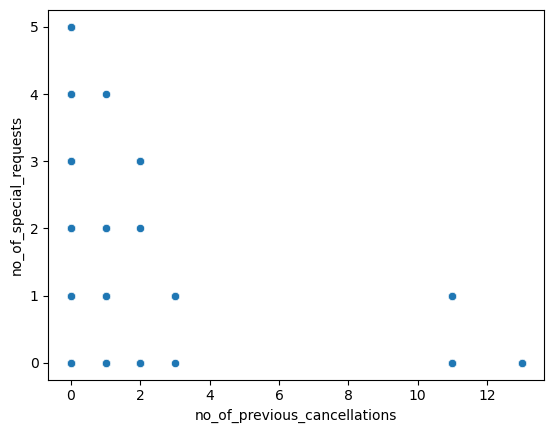


columns:- no_of_previous_bookings_not_canceled and no_of_adults


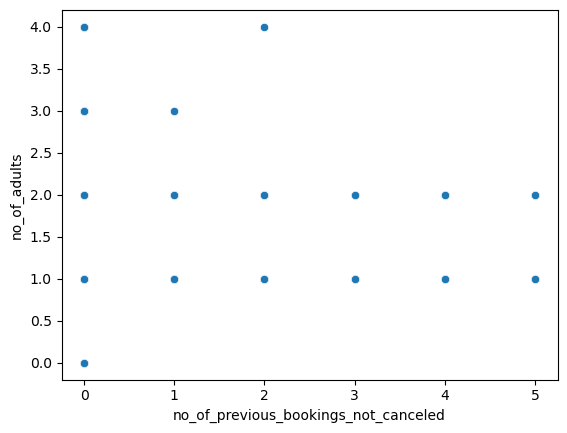


columns:- no_of_previous_bookings_not_canceled and no_of_children


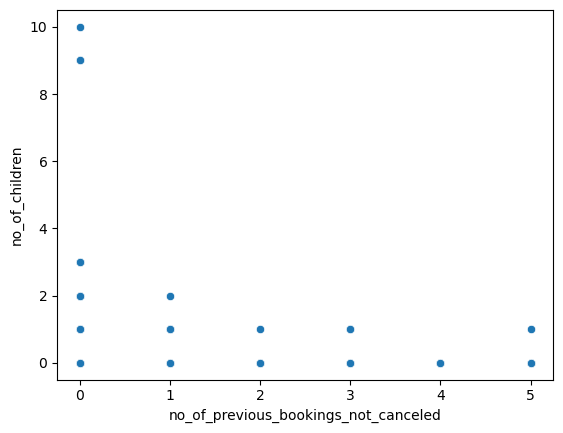


columns:- no_of_previous_bookings_not_canceled and no_of_weekend_nights


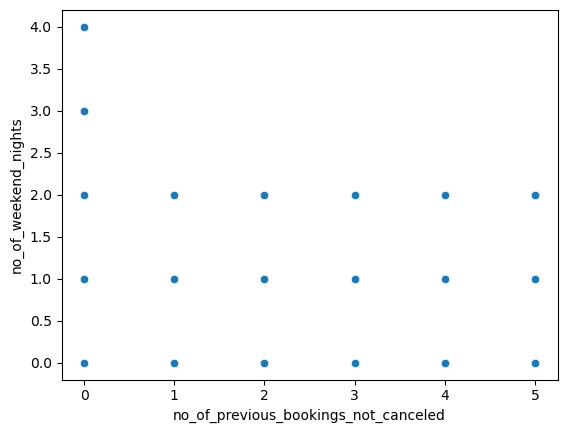


columns:- no_of_previous_bookings_not_canceled and no_of_week_nights


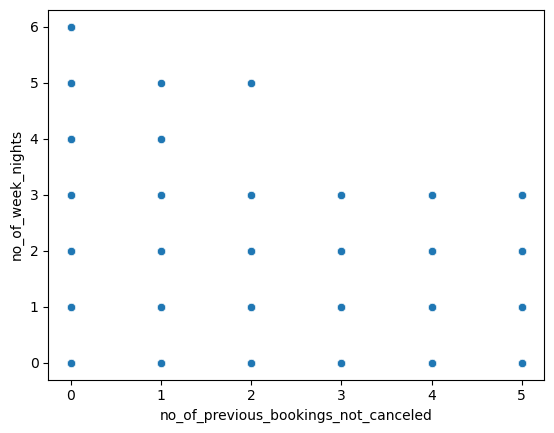


columns:- no_of_previous_bookings_not_canceled and required_car_parking_space


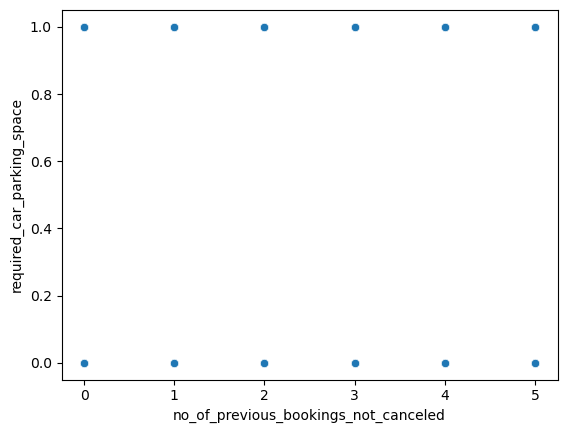


columns:- no_of_previous_bookings_not_canceled and lead_time


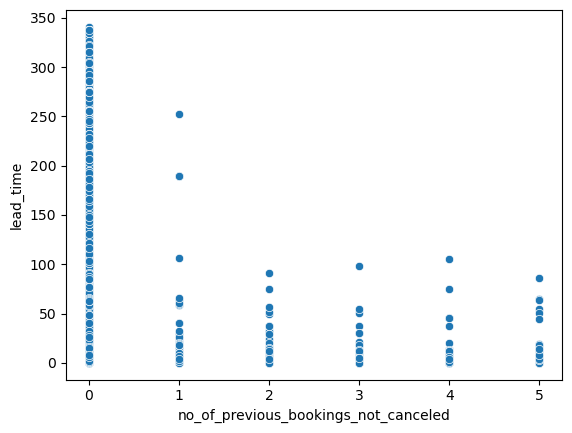


columns:- no_of_previous_bookings_not_canceled and repeated_guest


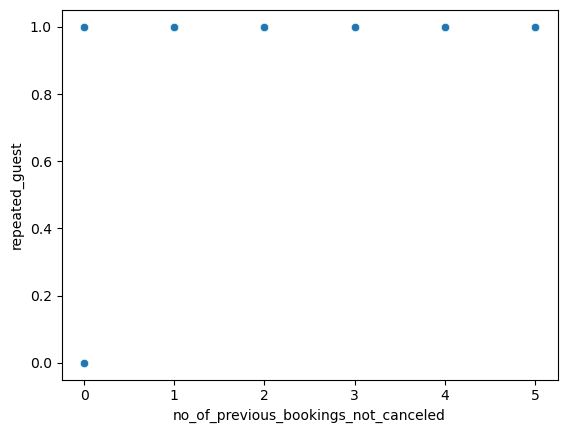


columns:- no_of_previous_bookings_not_canceled and no_of_previous_cancellations


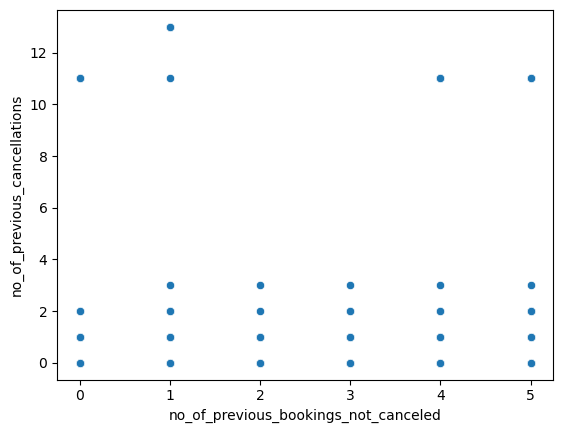


columns:- no_of_previous_bookings_not_canceled and avg_price_per_room


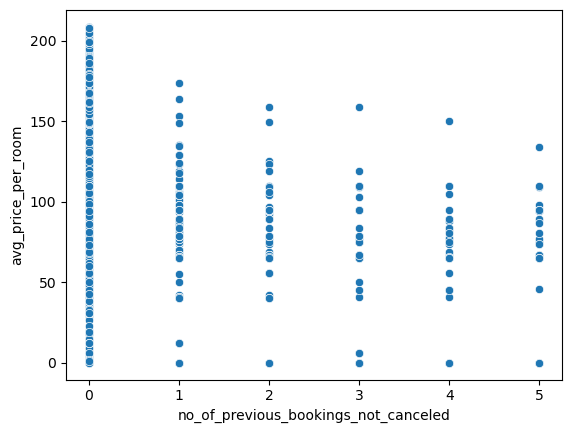


columns:- no_of_previous_bookings_not_canceled and no_of_special_requests


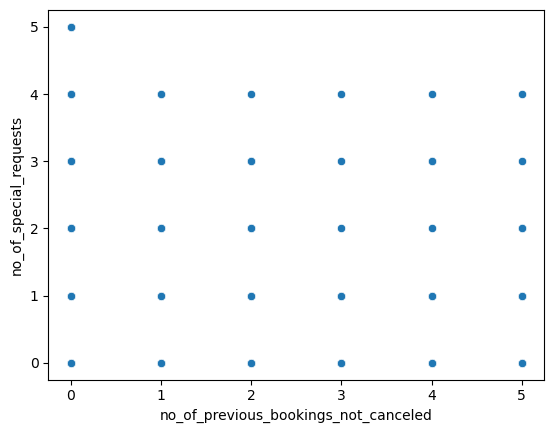


columns:- avg_price_per_room and no_of_adults


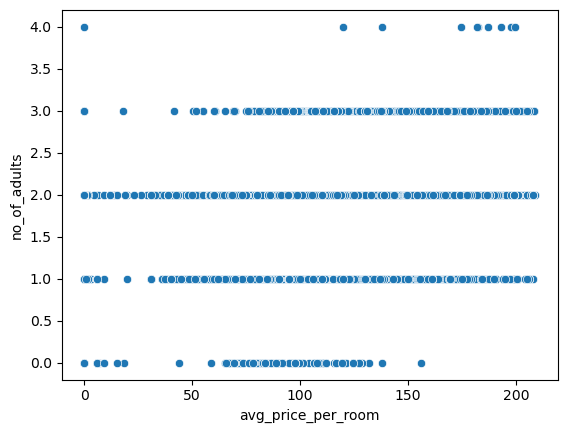


columns:- avg_price_per_room and no_of_children


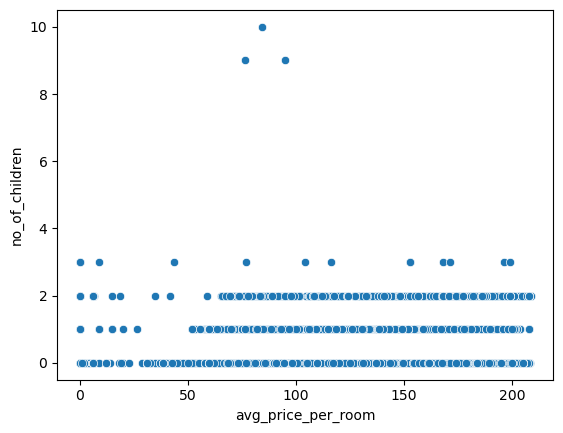


columns:- avg_price_per_room and no_of_weekend_nights


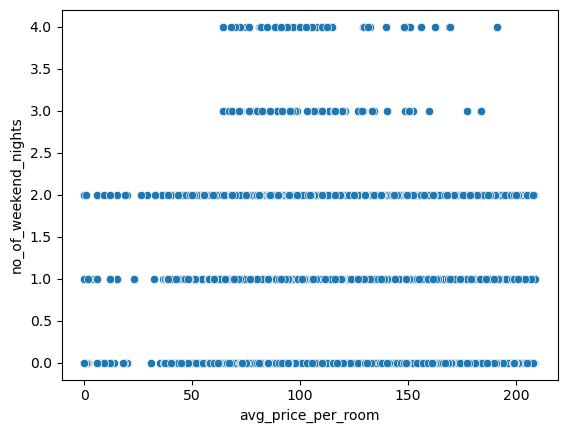


columns:- avg_price_per_room and no_of_week_nights


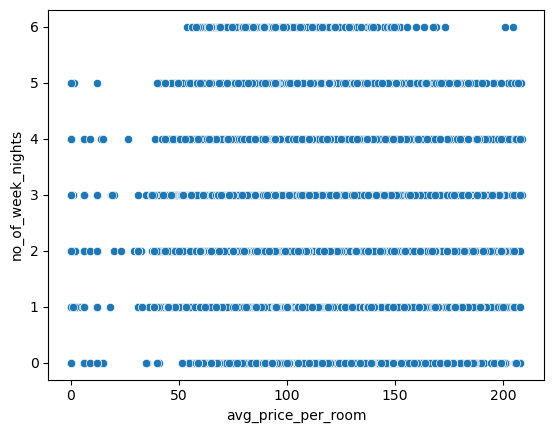


columns:- avg_price_per_room and required_car_parking_space


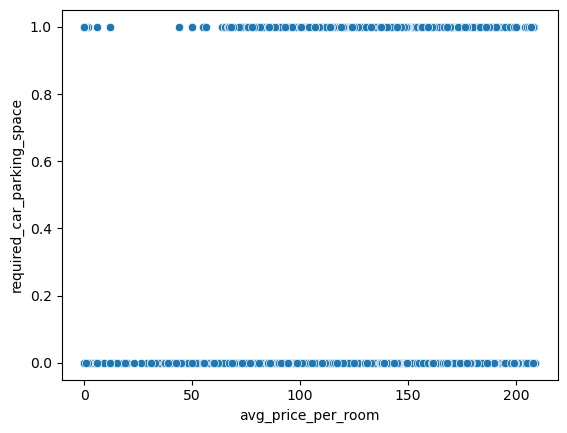


columns:- avg_price_per_room and lead_time


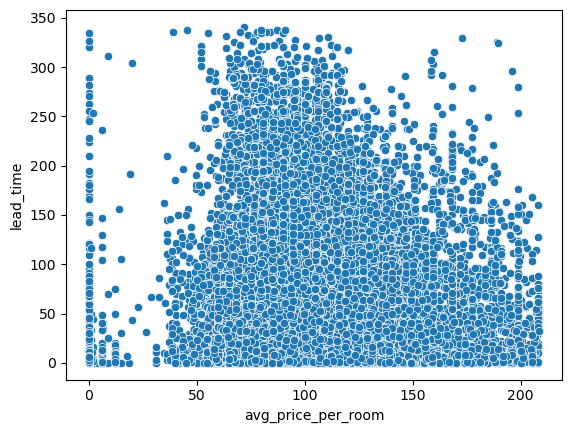


columns:- avg_price_per_room and repeated_guest


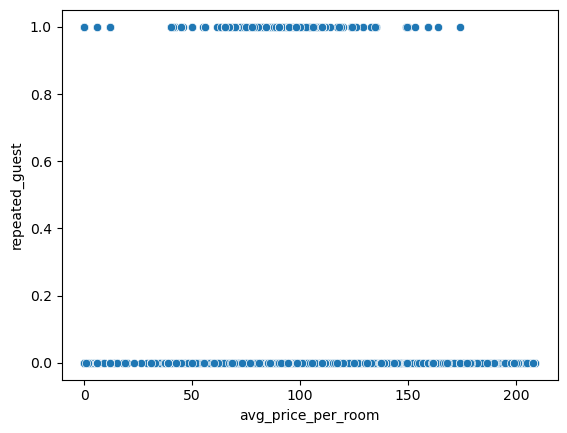


columns:- avg_price_per_room and no_of_previous_cancellations


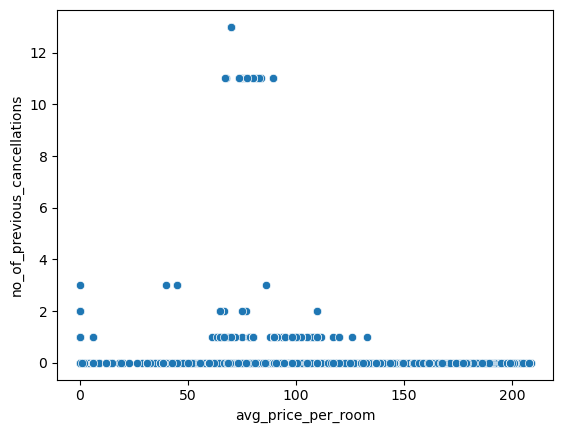


columns:- avg_price_per_room and no_of_previous_bookings_not_canceled


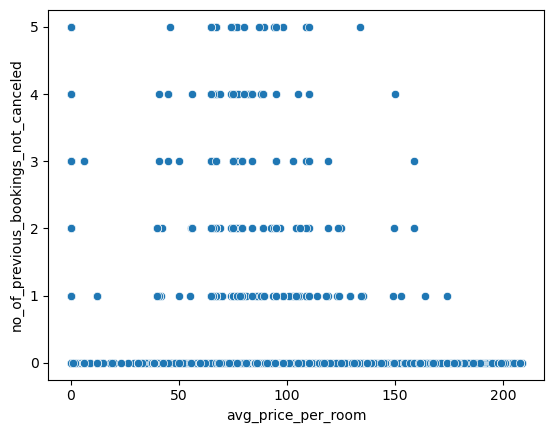


columns:- avg_price_per_room and no_of_special_requests


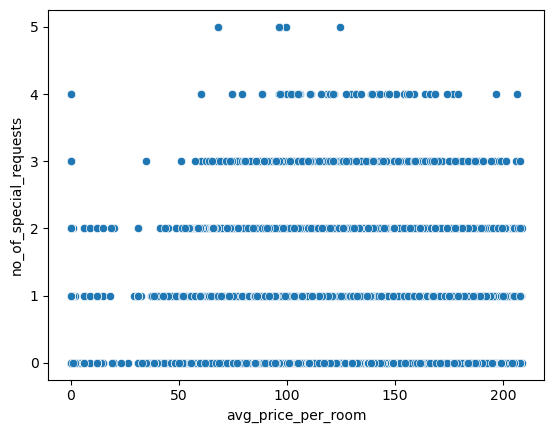


columns:- no_of_special_requests and no_of_adults


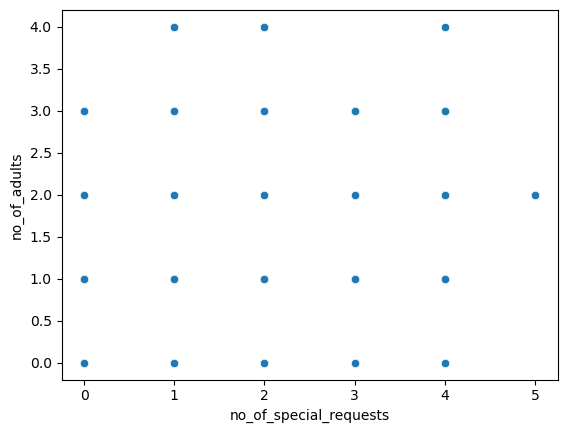


columns:- no_of_special_requests and no_of_children


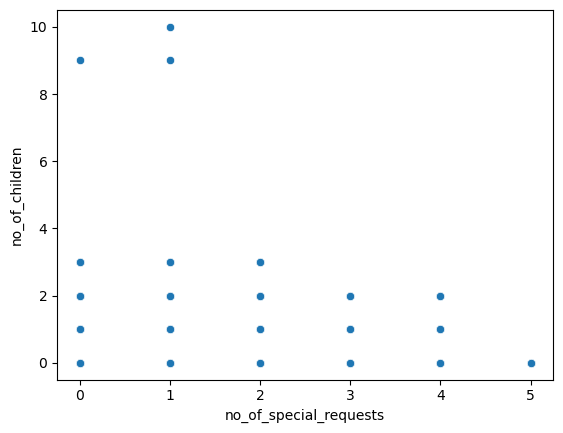


columns:- no_of_special_requests and no_of_weekend_nights


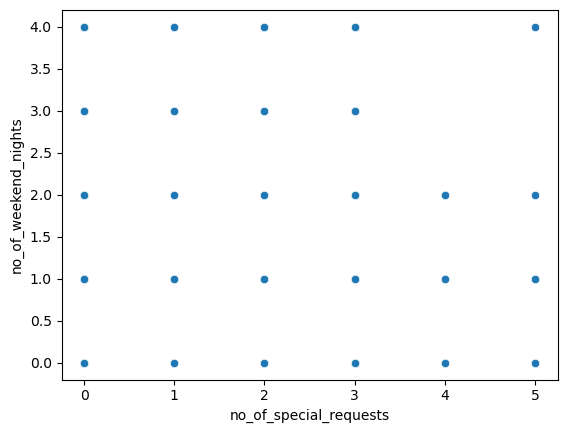


columns:- no_of_special_requests and no_of_week_nights


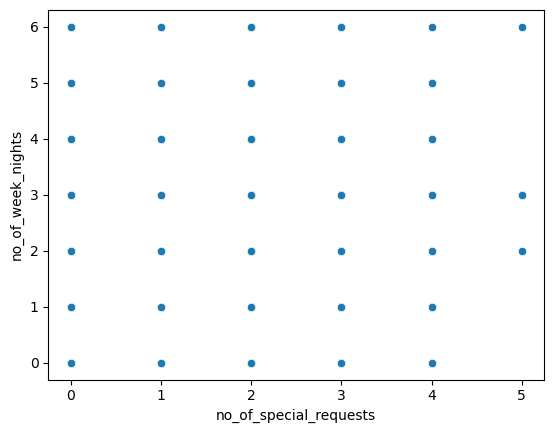


columns:- no_of_special_requests and required_car_parking_space


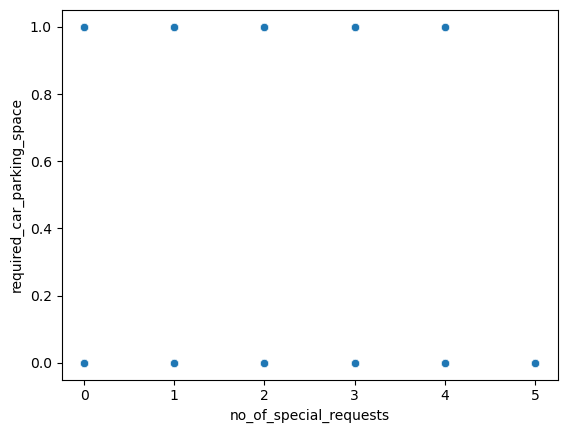


columns:- no_of_special_requests and lead_time


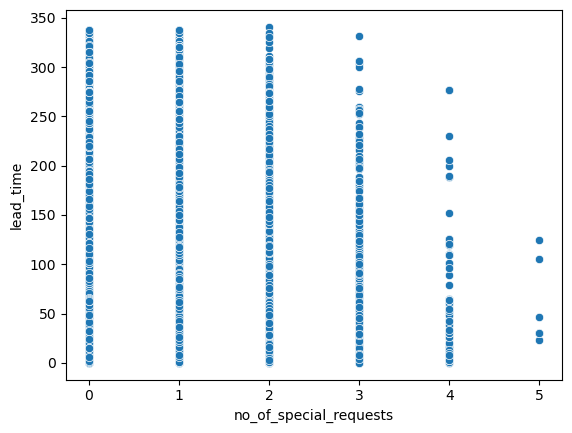


columns:- no_of_special_requests and repeated_guest


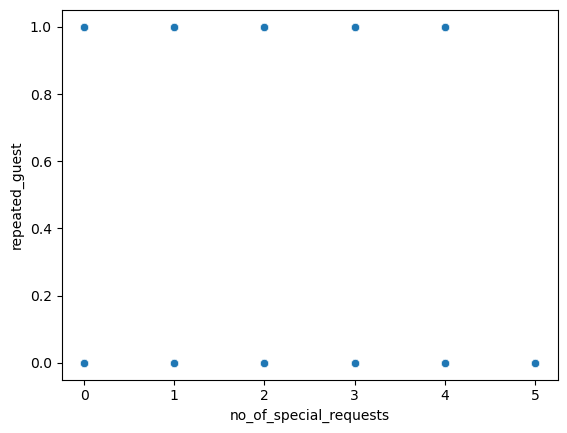


columns:- no_of_special_requests and no_of_previous_cancellations


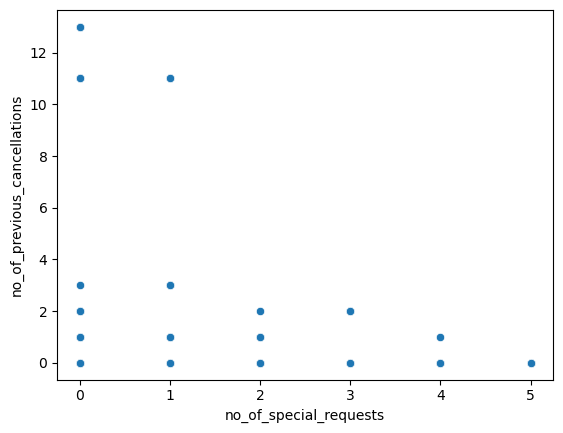


columns:- no_of_special_requests and no_of_previous_bookings_not_canceled


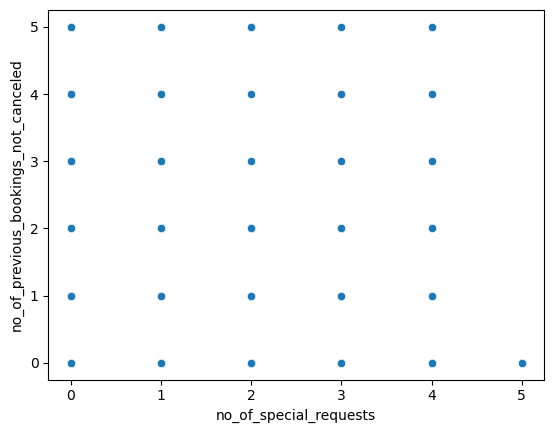


columns:- no_of_special_requests and avg_price_per_room


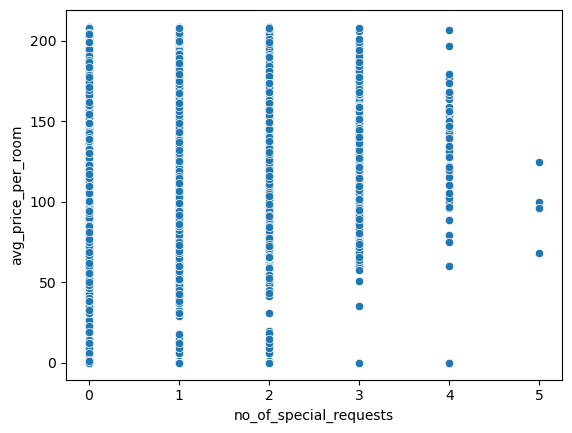

In [52]:
for i in numerical_var:
    for j in numerical_var:
        if i !=j:
            print(f"columns:- {i} and {j}")
            sns.scatterplot(x = i,y= j,data = df)
            plt.show()
            print("")
        

# Heatmap

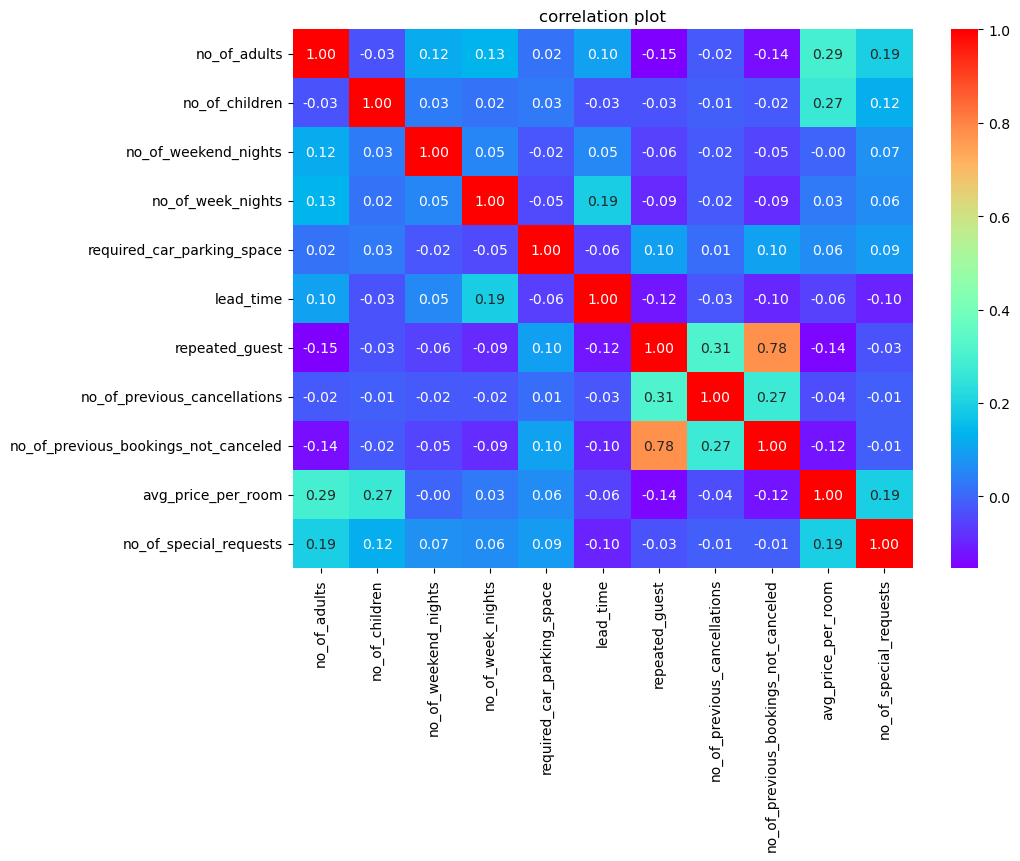

In [53]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),annot = True,fmt =".2f",cmap ="rainbow")
plt.title("correlation plot")
plt.show()

In [54]:
df.corr()

no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.030629   
no_of_children                           -0.030629        1.000000   
no_of_weekend_nights                      0.118500        0.031276   
no_of_week_nights                         0.134594        0.020472   
required_car_parking_space                0.017440        0.028224   
lead_time                                 0.098611       -0.029903   
repeated_guest                           -0.154227       -0.029082   
no_of_previous_cancellations             -0.023055       -0.010777   
no_of_previous_bookings_not_canceled     -0.135748       -0.022562   
avg_price_per_room                        0.294345        0.267229   
no_of_special_requests                    0.193263        0.122496   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                      0.118500           0.134594   
no_of_children                                    0.031276           0.020472   
no_of_weekend_nights                              1.000000           0.050036   
no_of_week_nights                                 0.050036           1.000000   
required_car_parking_space                       -0.024902          -0.045766   
lead_time                                         0.054048           0.191347   
repeated_guest                                   -0.057980          -0.091829   
no_of_previous_cancellations                     -0.021174          -0.022905   
no_of_previous_bookings_not_canceled             -0.054406          -0.087812   
avg_price_per_room                               -0.002595           0.029310   
no_of_special_requests                            0.068260           0.058485   

                                      required_car_parking_space  lead_time  \
no_of_adults                                            0.017440   0.098611   
no_of_children                                          0.028224  -0.029903   
no_of_weekend_nights                                   -0.024902   0.054048   
no_of_week_nights                                      -0.045766   0.191347   
required_car_parking_space                              1.000000  -0.061199   
lead_time                                              -0.061199   1.000000   
repeated_guest                                          0.096676  -0.121875   
no_of_previous_cancellations                            0.011725  -0.027394   
no_of_previous_bookings_not_canceled                    0.101119  -0.097354   
avg_price_per_room                                      0.061323  -0.055878   
no_of_special_requests                                  0.085670  -0.102891   

                                      repeated_guest  \
no_of_adults                               -0.154227   
no_of_children                             -0.029082   
no_of_weekend_nights                       -0.057980   
no_of_week_nights                          -0.091829   
required_car_parking_space                  0.096676   
lead_time                                  -0.121875   
repeated_guest                              1.000000   
no_of_previous_cancellations                0.310740   
no_of_previous_bookings_not_canceled        0.775266   
avg_price_per_room                         -0.141708   
no_of_special_requests                     -0.031443   

                                      no_of_previous_cancellations  \
no_of_adults                                             -0.023055   
no_of_children                                           -0.010777   
no_of_weekend_nights                                     -0.021174   
no_of_week_nights                                        -0.022905   
required_car_parking_space                                0.011725   
lead_time                                                -0.027394   
repeated_guest                                            0.310740   
no_of_previous_cancellations              

In [55]:
df.describe().transpose()

count        mean        std  min  \
no_of_adults                          34959.0    1.849109   0.515924  0.0   
no_of_children                        34959.0    0.094568   0.376803  0.0   
no_of_weekend_nights                  34959.0    0.792872   0.834445  0.0   
no_of_week_nights                     34959.0    2.152264   1.244572  0.0   
required_car_parking_space            34959.0    0.030092   0.170844  0.0   
lead_time                             34959.0   83.044052  80.905308  0.0   
repeated_guest                        34959.0    0.018736   0.135594  0.0   
no_of_previous_cancellations          34959.0    0.012300   0.286464  0.0   
no_of_previous_bookings_not_canceled  34959.0    0.035728   0.333512  0.0   
avg_price_per_room                    34959.0  102.569742  32.454695  0.0   
no_of_special_requests                34959.0    0.615292   0.785129  0.0   

                                        25%    50%    75%     max  
no_of_adults                           2.00   2.00    2.0    4.00  
no_of_children                         0.00   0.00    0.0   10.00  
no_of_weekend_nights                   0.00   1.00    2.0    4.00  
no_of_week_nights                      1.00   2.00    3.0    6.00  
required_car_parking_space             0.00   0.00    0.0    1.00  
lead_time                             17.00  57.00  124.0  341.00  
repeated_guest                         0.00   0.00    0.0    1.00  
no_of_previous_cancellations           0.00   0.00    0.0   13.00  
no_of_previous_bookings_not_canceled   0.00   0.00    0.0    5.00  
avg_price_per_room                    80.75  99.45  120.0  208.66  
no_of_special_requests                 0.00   0.00    1.0    5.00

In [56]:
df.describe(include = "all").transpose()

count unique           top   freq  \
no_of_adults                          34959.0    NaN           NaN    NaN   
no_of_children                        34959.0    NaN           NaN    NaN   
no_of_weekend_nights                  34959.0    NaN           NaN    NaN   
no_of_week_nights                     34959.0    NaN           NaN    NaN   
type_of_meal_plan                       34959      4   Meal Plan 1  26937   
required_car_parking_space            34959.0    NaN           NaN    NaN   
room_type_reserved                      34959      7   Room_Type 1  27272   
lead_time                             34959.0    NaN           NaN    NaN   
market_segment_type                     34959      5        Online  22515   
repeated_guest                        34959.0    NaN           NaN    NaN   
no_of_previous_cancellations          34959.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  34959.0    NaN           NaN    NaN   
avg_price_per_room                    34959.0    NaN           NaN    NaN   
no_of_special_requests                34959.0    NaN           NaN    NaN   
booking_status                          34959      2  Not_Canceled  23798   

                                            mean        std  min    25%  \
no_of_adults                            1.849109   0.515924  0.0    2.0   
no_of_children                          0.094568   0.376803  0.0    0.0   
no_of_weekend_nights                    0.792872   0.834445  0.0    0.0   
no_of_week_nights                       2.152264   1.244572  0.0    1.0   
type_of_meal_plan                            NaN        NaN  NaN    NaN   
required_car_parking_space              0.030092   0.170844  0.0    0.0   
room_type_reserved                           NaN        NaN  NaN    NaN   
lead_time                              83.044052  80.905308  0.0   17.0   
market_segment_type                          NaN        NaN  NaN    NaN   
repeated_guest                          0.018736   0.135594  0.0    0.0   
no_of_previous_cancellations              0.0123   0.286464  0.0    0.0   
no_of_previous_bookings_not_canceled    0.035728   0.333512  0.0    0.0   
avg_price_per_room                    102.569742  32.454695  0.0  80.75   
no_of_special_requests                  0.615292   0.785129  0.0    0.0   
booking_status                               NaN        NaN  NaN    NaN   

                                        50%    75%     max  
no_of_adults                            2.0    2.0     4.0  
no_of_children                          0.0    0.0    10.0  
no_of_weekend_nights                    1.0    2.0     4.0  
no_of_week_nights                       2.0    3.0     6.0  
type_of_meal_plan                       NaN    NaN     NaN  
required_car_parking_space              0.0    0.0     1.0  
room_type_reserved                      NaN    NaN     NaN  
lead_time                              57.0  124.0   341.0  
market_segment_type                     NaN    NaN     NaN  
repeated_guest                          0.0    0.0     1.0  
no_of_previous_cancellations            0.0    0.0    13.0  
no_of_previous_bookings_not_canceled    0.0    0.0     5.0  
avg_price_per_room                    99.45  120.0  208.66  
no_of_special_requests                  0.0    1.0     5.0  
booking_status                          NaN    NaN     NaN

# Feature Engineering

In [57]:
from sklearn.model_selection import train_test_split
X = df.drop("booking_status",axis =1)
y = df["booking_status"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size=0.3)
X_train.shape,X_test.shape

((24471, 14), (10488, 14))

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [59]:
from sklearn.compose import ColumnTransformer
tfm1=ColumnTransformer(transformers = [
    ("type_of_meal_plan",OneHotEncoder(drop="first",sparse=False),[4]),
    ("room_type_reserved",OrdinalEncoder(categories =[['Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4',
    'Room_Type 5','Room_Type 6','Room_Type 7']]),[6]),
    ("market_segment_type",OneHotEncoder(drop ="first",sparse=False),[8])
],remainder= "passthrough")

In [60]:
tfm2 = ColumnTransformer(transformers=[
    ("no_of_adults",RobustScaler(),[3]),
    ("no_of_children",RobustScaler(),[4]),
    ("no_of_weekend_nights",StandardScaler(),[5]),
    ("no_of_week_nights",StandardScaler(),[6]),
    ("lead_time",StandardScaler(),[8]),
    ("avg_price_per_room",StandardScaler(),[12]),
    ("no_of_special_requests",StandardScaler(),[13]),
],remainder ="passthrough")

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [62]:
y_train_enc

array([1, 1, 0, ..., 1, 0, 1])

In [63]:
y_test_enc

array([1, 1, 1, ..., 1, 0, 0])

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
pipe = Pipeline([
    ("tfm1",tfm1),
    ("tfm2",tfm2)
])

In [66]:
X_train_tfm= pipe.fit_transform(X_train)
X_test_tfm= pipe.transform(X_test)

In [67]:
from imblearn.combine import SMOTETomek
samp = SMOTETomek()
X_train_samp,y_train_samp=samp.fit_resample(X_train_tfm,y_train_enc)

In [68]:
np.bincount(y_train_samp),np.unique(y_train_samp)

(array([16082, 16082], dtype=int64), array([0, 1]))

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

In [70]:
lor_model = lor.fit(X_train_samp,y_train_samp)
lor_model

LogisticRegression()

In [71]:
lor_y_pred = lor_model.predict(X_test_tfm)
lor_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,precision_score,recall_score

In [73]:
accuracy_score(y_test_enc,lor_y_pred)

0.7746948893974066

In [74]:
def cm(act,pred):
    plt.figure(figsize = (6,6))
    CM = sns.heatmap(confusion_matrix(act,pred),annot=True,fmt =".2f",xticklabels = ["yes","no"],yticklabels =["yes","no"])
    plt.title("confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return CM

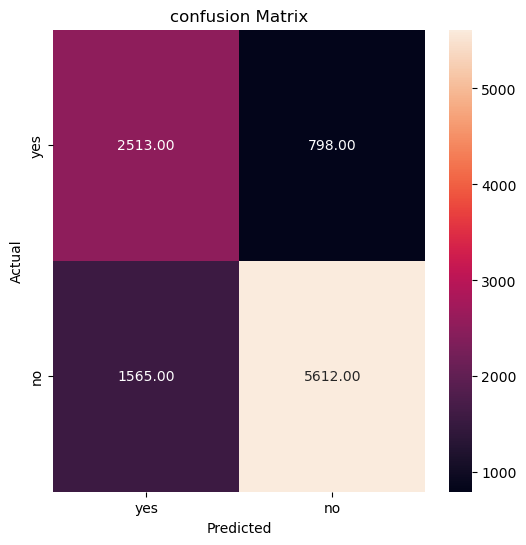

<AxesSubplot:title={'center':'confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [75]:
cm(y_test_enc,lor_y_pred)

In [76]:
print(classification_report(y_test_enc,lor_y_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68      3311
           1       0.88      0.78      0.83      7177

    accuracy                           0.77     10488
   macro avg       0.75      0.77      0.75     10488
weighted avg       0.79      0.77      0.78     10488



In [77]:
def roc(act,pred):
    fpr,tpr,threshold = roc_curve(act,pred,drop_intermediate = False)
    roc_crv=plt.plot(fpr,tpr)
    plt.title("Roc Curve")
    plt.xlabel("False Possitive rate")
    plt.ylabel("True Possitive rate")
    plt.show()
    return roc_crv,fpr,tpr,threshold

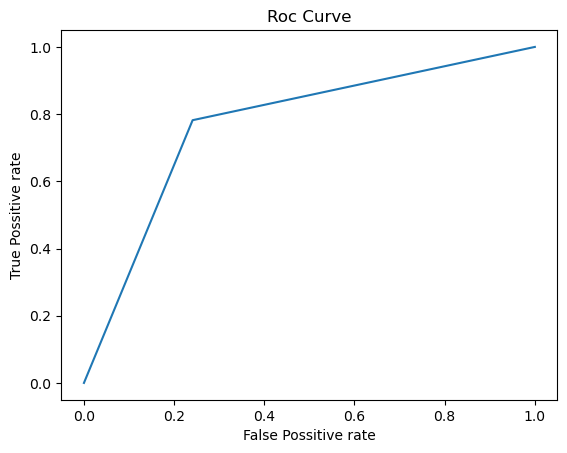

([<matplotlib.lines.Line2D at 0x25d80043c10>],
 array([0.       , 0.2410148, 1.       ]),
 array([0.        , 0.78194232, 1.        ]),
 array([2, 1, 0]))

In [78]:
roc(y_test_enc,lor_y_pred)

In [79]:
precision_score(y_test_enc,lor_y_pred)

0.8755070202808113

In [80]:
recall_score(y_test_enc,lor_y_pred)

0.7819423157308067

In [81]:
lor_y_prob = lor_model.predict_proba(X_test_tfm)
lor_y_prob

array([[0.26150438, 0.73849562],
       [0.0178579 , 0.9821421 ],
       [0.59980358, 0.40019642],
       ...,
       [0.47689683, 0.52310317],
       [0.58298482, 0.41701518],
       [0.99109477, 0.00890523]])

In [82]:
lor_mod = pd.Series({
    "Model":"Logistic Regression",
    "Accuracy Score" : accuracy_score(y_test_enc,lor_y_pred),
    "precision score": precision_score(y_test_enc,lor_y_pred),
    "Recall score" : recall_score(y_test_enc,lor_y_pred),
})

In [83]:
result_tab=pd.DataFrame()

In [84]:
result_tab = result_tab.append(lor_mod,ignore_index=True)
result_tab

Model  Accuracy Score  precision score  Recall score
0  Logistic Regression        0.774695         0.875507      0.781942

# Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion ="gini",max_depth=6,min_samples_split =20)
dt_model = dt.fit(X_train_samp,y_train_samp)
dt_model

DecisionTreeClassifier(max_depth=6, min_samples_split=20)

In [86]:
dt_y_pred = dt_model.predict(X_test_tfm)
dt_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [87]:
accuracy_score(y_test_enc,dt_y_pred)

0.8232265446224256

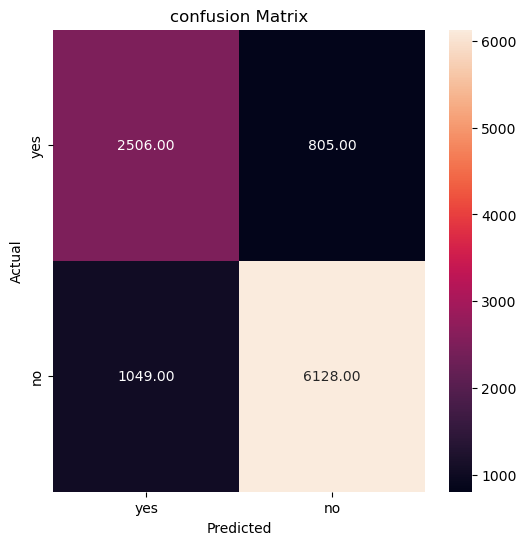

<AxesSubplot:title={'center':'confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

In [88]:
cm(y_test_enc,dt_y_pred)

In [89]:
print(classification_report(y_test_enc,dt_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      3311
           1       0.88      0.85      0.87      7177

    accuracy                           0.82     10488
   macro avg       0.79      0.81      0.80     10488
weighted avg       0.83      0.82      0.82     10488



In [90]:
from sklearn.model_selection import GridSearchCV
dt_params = {
    "criterion":["gini","entropy"],
    "min_samples_split":range(10,20),
    "max_depth":range(3,10)
}
gs = GridSearchCV(DecisionTreeClassifier(),dt_params,cv = 10,scoring = "accuracy")
dt_gs = gs.fit(X_train_samp,y_train_samp)

In [91]:
dt_gs.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 12}

In [92]:
dt_gs.best_score_

0.8687994110114643

In [93]:
dt_mod= pd.Series({
    "Model":"Decision Tree",
    "Accuracy Score":accuracy_score(y_test_enc,dt_y_pred),
    "Precision Score":precision_score(y_test_enc,dt_y_pred),
    "Recall Score" : recall_score(y_test_enc,dt_y_pred),
})

In [94]:
result_tab = result_tab.append(dt_mod,ignore_index=True)
result_tab

Model  Accuracy Score  precision score  Recall score  \
0  Logistic Regression        0.774695         0.875507      0.781942   
1        Decision Tree        0.823227              NaN           NaN   

   Precision Score  Recall Score  
0              NaN           NaN  
1         0.883889      0.853839

# Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion="entropy",max_depth = 9,min_samples_split =20,n_estimators =100)
rf_model = rf.fit(X_train_samp,y_train_samp)
rf_model

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=20)

In [96]:
rf_y_pred = rf_model.predict(X_test_tfm)
rf_y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [97]:
accuracy_score(y_test_enc,rf_y_pred)

0.8453470633104501

In [104]:
rf_tun = [{'criterion':["entropy","gini"],'min_samples_split':(2,5),'n_estimators':(50,100),'max_depth':[20]}]
gs_rf = GridSearchCV(RandomForestClassifier(),rf_tun,cv = 10,scoring = 'accuracy')
gs_rf.fit(X_train_samp,y_train_samp)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'], 'max_depth': [20],
                          'min_samples_split': (2, 5),
                          'n_estimators': (50, 100)}],
             scoring='accuracy')

In [105]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 100}

In [106]:
gs_rf.best_score_

0.9198211131937454

# K-Nearest Neighbors Algorithm

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [115]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=7)


In [116]:
ensemble = VotingClassifier(estimators=[("knn1", knn1), 
                                        ("knn2", knn2), 
                                        ("knn3", knn3)], 
                            voting="hard")

In [117]:
ensemble.fit(X_train_samp, y_train_samp)

VotingClassifier(estimators=[('knn1', KNeighborsClassifier(n_neighbors=3)),
                             ('knn2', KNeighborsClassifier()),
                             ('knn3', KNeighborsClassifier(n_neighbors=7))])

In [118]:
KN_y_pred = ensemble.predict(X_test_tfm)

In [119]:
accuracy = accuracy_score(y_test_enc, KN_y_pred)


In [120]:
accuracy

0.8073989321128909

#In conclusion, using a Decision Tree classifier and optimizing its hyperparameters can be an effective way to improve the accuracy of a machine learning model. I'm excited to continue working on similar projects and further improve my skills in the field of data science and machine learning.